In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv(r"/content/drive/MyDrive/bankloan/loan_data.csv")


In [5]:
# null check

df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE_x              0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
DAYS_FIRST_DUE               561106
DAYS_LAST_DUE_1ST_VERSION    561106
DAYS_LAST_DUE                561106
DAYS_TERMINATION             561106
NFLAG_INSURED_ON_APPROVAL    561106
Length: 158, dtype: int64

In [6]:
df.shape

(1413701, 158)

In [7]:
# dropping unnecessary columns
df.drop(
    [
       "FLAG_EMP_PHONE","FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL","CNT_FAM_MEMBERS", "CNT_CHILDREN", "WEEKDAY_APPR_PROCESS_START_x", "HOUR_APPR_PROCESS_START_x", "REG_REGION_NOT_WORK_REGION",
        "LIVE_REGION_NOT_WORK_REGION", "EXT_SOURCE_1", "EXT_SOURCE_2","EXT_SOURCE_3", "WEEKDAY_APPR_PROCESS_START_y", "HOUR_APPR_PROCESS_START_y", "REGION_POPULATION_RELATIVE",
        "OWN_CAR_AGE", "FLAG_CONT_MOBILE", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "APARTMENTS_AVG", "BASEMENTAREA_AVG","YEARS_BEGINEXPLUATATION_AVG", "YEARS_BUILD_AVG",
        "COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG","LANDAREA_AVG", "LIVINGAPARTMENTS_AVG",  "LIVINGAREA_AVG","NONLIVINGAPARTMENTS_AVG",
        "NONLIVINGAREA_AVG", "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BUILD_MODE", "COMMONAREA_MODE","ELEVATORS_MODE", "ENTRANCES_MODE",
        "FLOORSMAX_MODE","FLOORSMIN_MODE", "LANDAREA_MODE","LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE","NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE", "APARTMENTS_MEDI","BASEMENTAREA_MEDI",
        "YEARS_BEGINEXPLUATATION_MEDI","YEARS_BUILD_MEDI","COMMONAREA_MEDI", "ELEVATORS_MEDI","ENTRANCES_MEDI","FLOORSMAX_MEDI","FLOORSMIN_MEDI", "LANDAREA_MEDI","LIVINGAPARTMENTS_MEDI",
        "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI","NONLIVINGAREA_MEDI", "FONDKAPREMONT_MODE","HOUSETYPE_MODE", "TOTALAREA_MODE","WALLSMATERIAL_MODE","EMERGENCYSTATE_MODE",'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
         'DAYS_BIRTH', "DAYS_REGISTRATION","REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "DAYS_LAST_PHONE_CHANGE", "DAYS_DECISION", "CHANNEL_TYPE",
        "DAYS_TERMINATION","PRODUCT_COMBINATION", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8","FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11",
        "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15","FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"
    ],
    axis=1,
    inplace=True
)


In [8]:
df.shape

(1413701, 59)

In [9]:
df.dtypes


SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE_x            object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
AMT_INCOME_TOTAL               float64
AMT_CREDIT_x                   float64
AMT_ANNUITY_x                  float64
AMT_GOODS_PRICE_x              float64
NAME_TYPE_SUITE_x               object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
DAYS_EMPLOYED                    int64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
OCCUPATION_TYPE                 object
REG_REGION_NOT_LIVE_REGION       int64
ORGANIZATION_TYPE               object
OBS_30_CNT_SOCIAL_CIRCLE       float64
DEF_30_CNT_SOCIAL_CIRCLE       float64
OBS_60_CNT_SOCIAL_CIRCLE       float64
DEF_60_CNT_SOCIAL_CIRCLE       float64
AMT_REQ_CREDIT_BUREAU_HOU

In [10]:
df.isnull().mean()

SK_ID_CURR                     0.000000e+00
TARGET                         0.000000e+00
NAME_CONTRACT_TYPE_x           0.000000e+00
CODE_GENDER                    0.000000e+00
FLAG_OWN_CAR                   0.000000e+00
FLAG_OWN_REALTY                0.000000e+00
AMT_INCOME_TOTAL               0.000000e+00
AMT_CREDIT_x                   0.000000e+00
AMT_ANNUITY_x                  6.578477e-05
AMT_GOODS_PRICE_x              8.544947e-04
NAME_TYPE_SUITE_x              2.494162e-03
NAME_INCOME_TYPE               0.000000e+00
NAME_EDUCATION_TYPE            0.000000e+00
NAME_FAMILY_STATUS             0.000000e+00
NAME_HOUSING_TYPE              0.000000e+00
DAYS_EMPLOYED                  0.000000e+00
DAYS_ID_PUBLISH                0.000000e+00
FLAG_MOBIL                     0.000000e+00
OCCUPATION_TYPE                3.236752e-01
REG_REGION_NOT_LIVE_REGION     0.000000e+00
ORGANIZATION_TYPE              0.000000e+00
OBS_30_CNT_SOCIAL_CIRCLE       2.225364e-03
DEF_30_CNT_SOCIAL_CIRCLE       2

In [11]:
bb=pd.DataFrame(df.isnull().sum())
bb

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE_x,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
AMT_INCOME_TOTAL,0
AMT_CREDIT_x,0
AMT_ANNUITY_x,93
AMT_GOODS_PRICE_x,1208


In [12]:
df.dropna(subset=["OCCUPATION_TYPE"], inplace=True)  # drop null columns


In [13]:
df["TARGET"].value_counts()

TARGET
0    865635
1     90486
Name: count, dtype: int64

In [14]:
df['DAYS_LAST_DUE'] = df['DAYS_LAST_DUE'].abs()  # making absolute values
df["DAYS_LAST_DUE_1ST_VERSION"]=df["DAYS_LAST_DUE_1ST_VERSION"].abs()
df["DAYS_FIRST_DUE"]=df["DAYS_FIRST_DUE"].abs()

In [15]:
# null value imputation

df["OBS_30_CNT_SOCIAL_CIRCLE"]. fillna(df["OBS_30_CNT_SOCIAL_CIRCLE"].mode().iloc[0],inplace=True)
df["OBS_60_CNT_SOCIAL_CIRCLE"]. fillna(df["OBS_60_CNT_SOCIAL_CIRCLE"].mode().iloc[0],inplace=True)
df["DEF_30_CNT_SOCIAL_CIRCLE"]. fillna(df["DEF_30_CNT_SOCIAL_CIRCLE"].mode().iloc[0],inplace=True)
df["DEF_60_CNT_SOCIAL_CIRCLE"]. fillna(df["DEF_60_CNT_SOCIAL_CIRCLE"].mode().iloc[0],inplace=True)

df['NAME_TYPE_SUITE_x'].fillna('unknown', inplace=True)
df['NAME_TYPE_SUITE_y'].fillna('unknown', inplace=True)


df["AMT_ANNUITY_x"].fillna(df["AMT_ANNUITY_x"].median(),inplace=True)
df["AMT_ANNUITY_y"].fillna(df["AMT_ANNUITY_y"].median(),inplace=True)
df["AMT_GOODS_PRICE_x"].fillna(df["AMT_GOODS_PRICE_x"].median(),inplace=True)
df["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(df["AMT_REQ_CREDIT_BUREAU_HOUR"].median(),inplace=True)
df["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(df["AMT_REQ_CREDIT_BUREAU_DAY"].median(),inplace=True)
df["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(df["AMT_REQ_CREDIT_BUREAU_WEEK"].median(),inplace=True)
df["AMT_REQ_CREDIT_BUREAU_MON"].fillna(df["AMT_REQ_CREDIT_BUREAU_MON"].median(),inplace=True)
df["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(df["AMT_REQ_CREDIT_BUREAU_QRT"].median(),inplace=True)
df["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(df["AMT_REQ_CREDIT_BUREAU_YEAR"].median(),inplace=True)
df["AMT_DOWN_PAYMENT"].fillna(df["AMT_DOWN_PAYMENT"].median(),inplace=True)
df["AMT_GOODS_PRICE_y"].fillna(df["AMT_GOODS_PRICE_y"].median(),inplace=True)
df["RATE_DOWN_PAYMENT"].fillna(df["RATE_DOWN_PAYMENT"].median(),inplace=True)
df["CNT_PAYMENT"].fillna(df["CNT_PAYMENT"].median(),inplace=True)
df["DAYS_FIRST_DRAWING"].fillna(df["DAYS_FIRST_DRAWING"].median(),inplace=True)
df["DAYS_FIRST_DUE"].fillna(df["DAYS_FIRST_DUE"].median(),inplace=True)
df["DAYS_LAST_DUE_1ST_VERSION"].fillna(df["DAYS_LAST_DUE_1ST_VERSION"].median(),inplace=True)
df["DAYS_LAST_DUE"].fillna(df["DAYS_LAST_DUE"].median(),inplace=True)
df["NFLAG_INSURED_ON_APPROVAL"].fillna(df["NFLAG_INSURED_ON_APPROVAL"].median(),inplace=True)


In [16]:
df.describe().T # statistical summary

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,956121.0,2.786024e+05,102923.532690,1.000020e+05,1.893380e+05,2.791240e+05,3.680730e+05,4.562550e+05
TARGET,956121.0,9.463865e-02,0.292715,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
AMT_INCOME_TOTAL,956121.0,1.797996e+05,228781.084935,2.565000e+04,1.125000e+05,1.575000e+05,2.250000e+05,1.170000e+08
AMT_CREDIT_x,956121.0,5.976028e+05,385007.685268,4.500000e+04,2.842560e+05,5.185620e+05,8.086500e+05,4.050000e+06
AMT_ANNUITY_x,956121.0,2.775552e+04,14009.263039,1.980000e+03,1.750950e+04,2.596050e+04,3.552300e+04,2.250000e+05
AMT_GOODS_PRICE_x,956121.0,5.362321e+05,353069.486183,4.050000e+04,2.475000e+05,4.500000e+05,6.840000e+05,4.050000e+06
DAYS_EMPLOYED,956121.0,-2.437763e+03,2831.328460,-1.791200e+04,-3.240000e+03,-1.747000e+03,-8.420000e+02,3.652430e+05
DAYS_ID_PUBLISH,956121.0,-2.830641e+03,1517.369034,-7.197000e+03,-4.196000e+03,-2.945000e+03,-1.530000e+03,0.000000e+00
FLAG_MOBIL,956121.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
REG_REGION_NOT_LIVE_REGION,956121.0,1.325146e-02,0.114350,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [17]:
 # ENCODING CATEGORICAL VARIABLE

In [18]:
df["NAME_EDUCATION_TYPE"].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [19]:
df["NAME_EDUCATION_TYPE"]= df["NAME_EDUCATION_TYPE"].map({'Secondary / secondary special':0, 'Higher education':1, 'Incomplete higher':2, 'Lower secondary':3, 'Academic degree':4})

In [20]:
df["NAME_EDUCATION_TYPE"].unique()

array([0, 1, 2, 3, 4])

In [21]:
from sklearn.preprocessing import OrdinalEncoder
df["OCCUPATION_TYPE"]= OrdinalEncoder().fit_transform(df[["OCCUPATION_TYPE"]])

In [22]:
df["OCCUPATION_TYPE"] = df["OCCUPATION_TYPE"].astype(int)

In [23]:
df["OCCUPATION_TYPE"].unique()

array([ 8,  3,  0, 10,  4, 14,  1, 12, 11, 16,  2,  6, 17,  9, 13, 15,  7,
        5])

Machine Learning Part

In [24]:
from sklearn.preprocessing import LabelEncoder     # fit & transform the encoded variables

df["NAME_FAMILY_STATUS"]= LabelEncoder().fit_transform(df[["NAME_FAMILY_STATUS"]])
df["NAME_CONTRACT_TYPE_x"]= LabelEncoder().fit_transform(df[["NAME_CONTRACT_TYPE_x"]])
df["CODE_GENDER"]= LabelEncoder().fit_transform(df[["CODE_GENDER"]])
df["NAME_TYPE_SUITE_x"]= LabelEncoder().fit_transform(df[["NAME_TYPE_SUITE_x"]])
df["NAME_INCOME_TYPE"]= LabelEncoder().fit_transform(df[["NAME_INCOME_TYPE"]])


In [25]:
df.info()  # ensuring data types

<class 'pandas.core.frame.DataFrame'>
Index: 956121 entries, 0 to 1413700
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   956121 non-null  int64  
 1   TARGET                       956121 non-null  int64  
 2   NAME_CONTRACT_TYPE_x         956121 non-null  int64  
 3   CODE_GENDER                  956121 non-null  int64  
 4   FLAG_OWN_CAR                 956121 non-null  object 
 5   FLAG_OWN_REALTY              956121 non-null  object 
 6   AMT_INCOME_TOTAL             956121 non-null  float64
 7   AMT_CREDIT_x                 956121 non-null  float64
 8   AMT_ANNUITY_x                956121 non-null  float64
 9   AMT_GOODS_PRICE_x            956121 non-null  float64
 10  NAME_TYPE_SUITE_x            956121 non-null  int64  
 11  NAME_INCOME_TYPE             956121 non-null  int64  
 12  NAME_EDUCATION_TYPE          956121 non-null  int64  
 13  NAM

In [26]:

# detecting the skewed columns using plot

def skewplot(df, column):
    plt.figure(figsize=(20, 4))

    # Distplot
    plt.subplot(1, 3, 1)
    sns.distplot(df[column], kde=True)
    plt.title("Distplot for " + column)


    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(df[column])
    plt.title("Box plot for " + column)

    # Violin plot
    plt.subplot(1, 3, 3)
    sns.violinplot(df[column])
    plt.title("Violin plot for " + column)

    plt.tight_layout()
    plt.show()

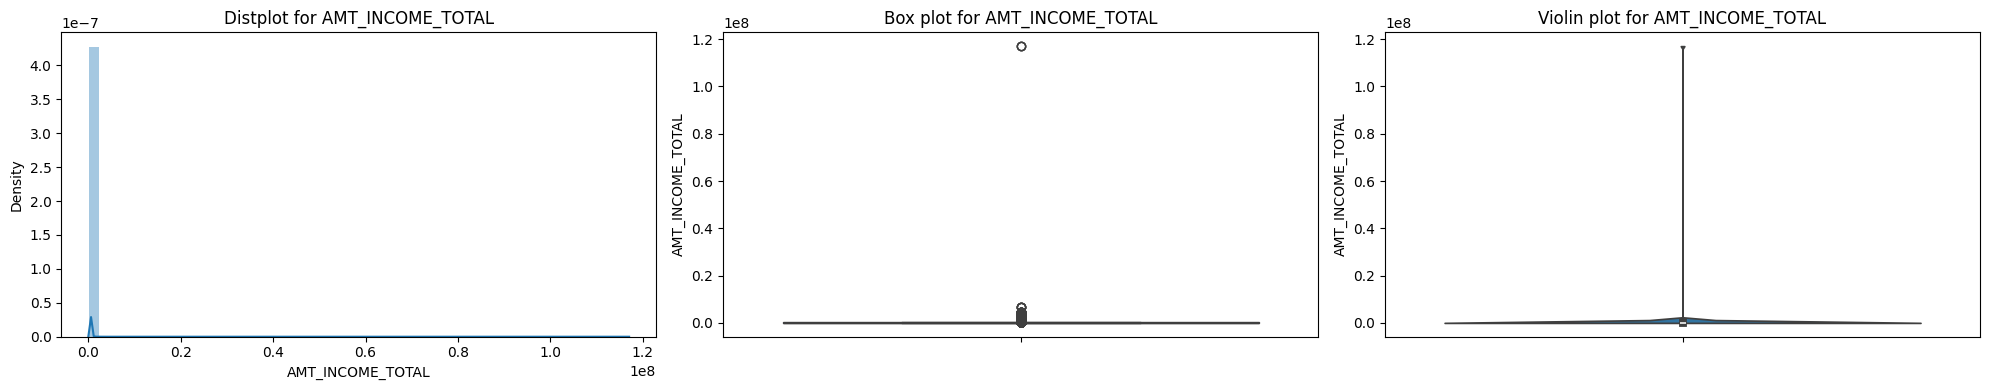

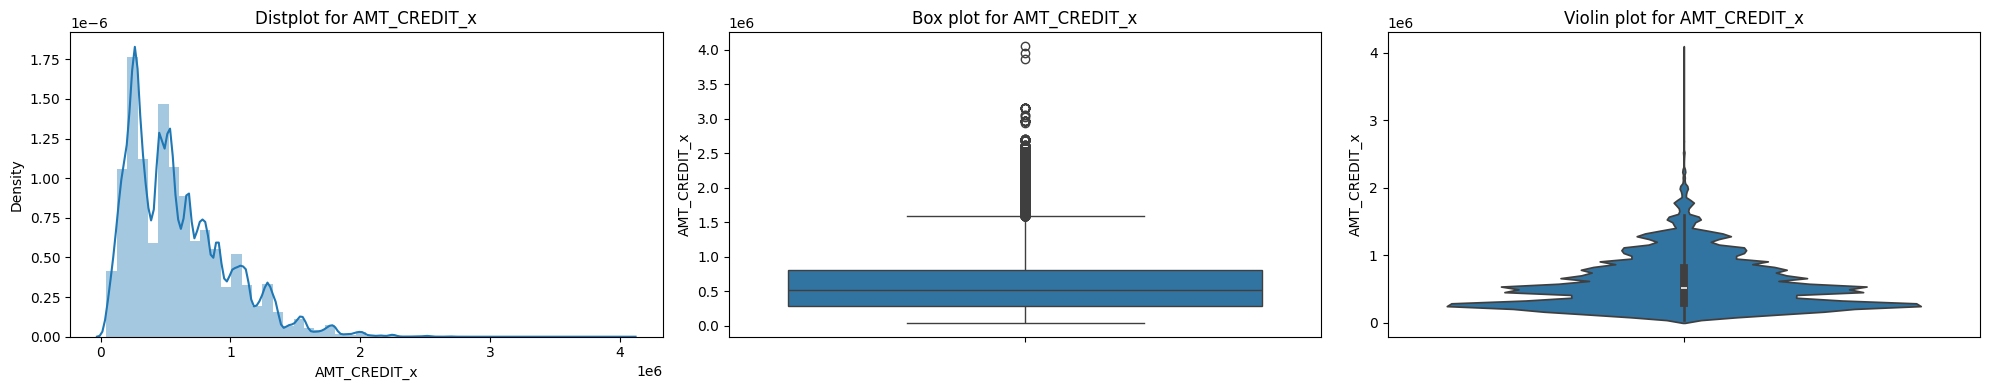

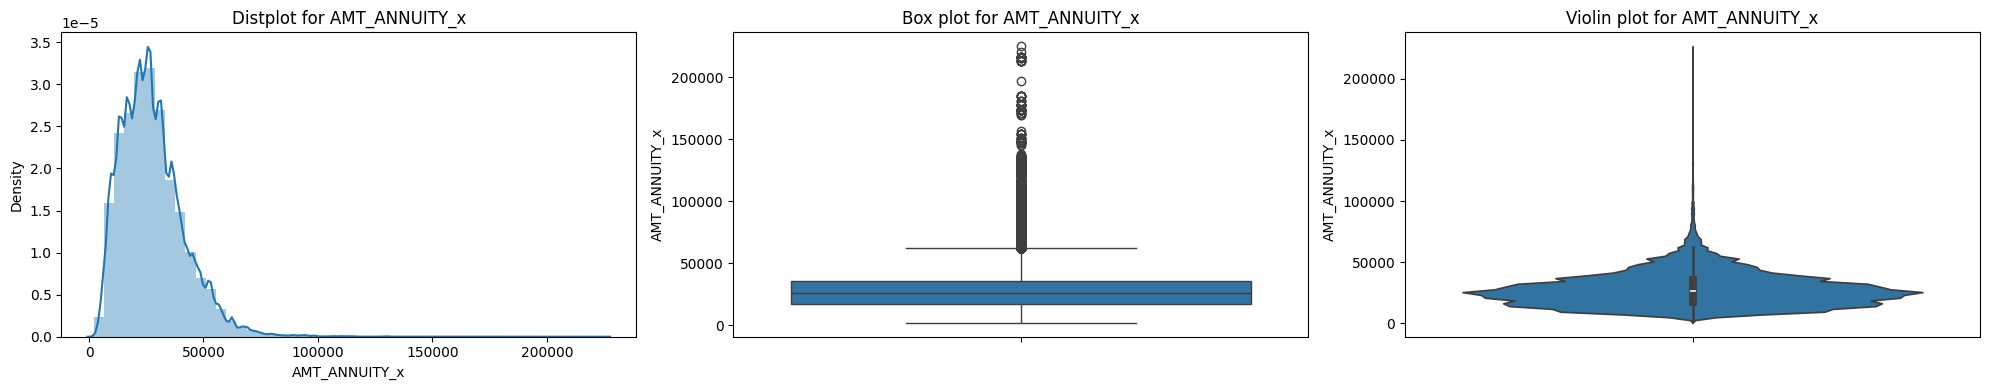

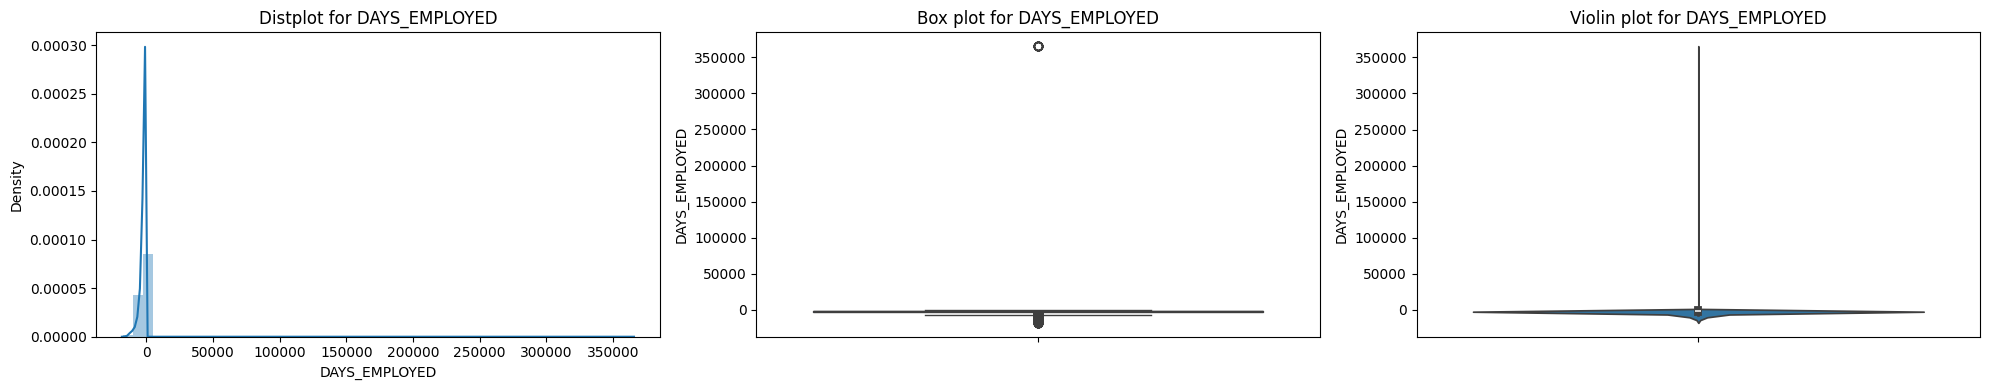

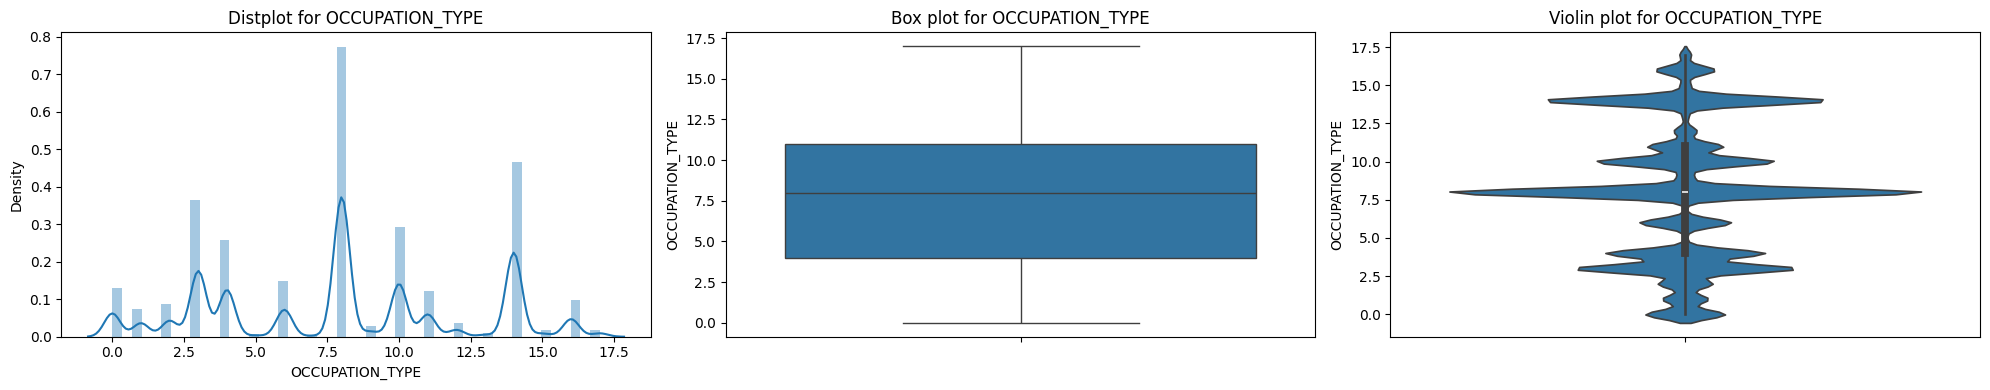

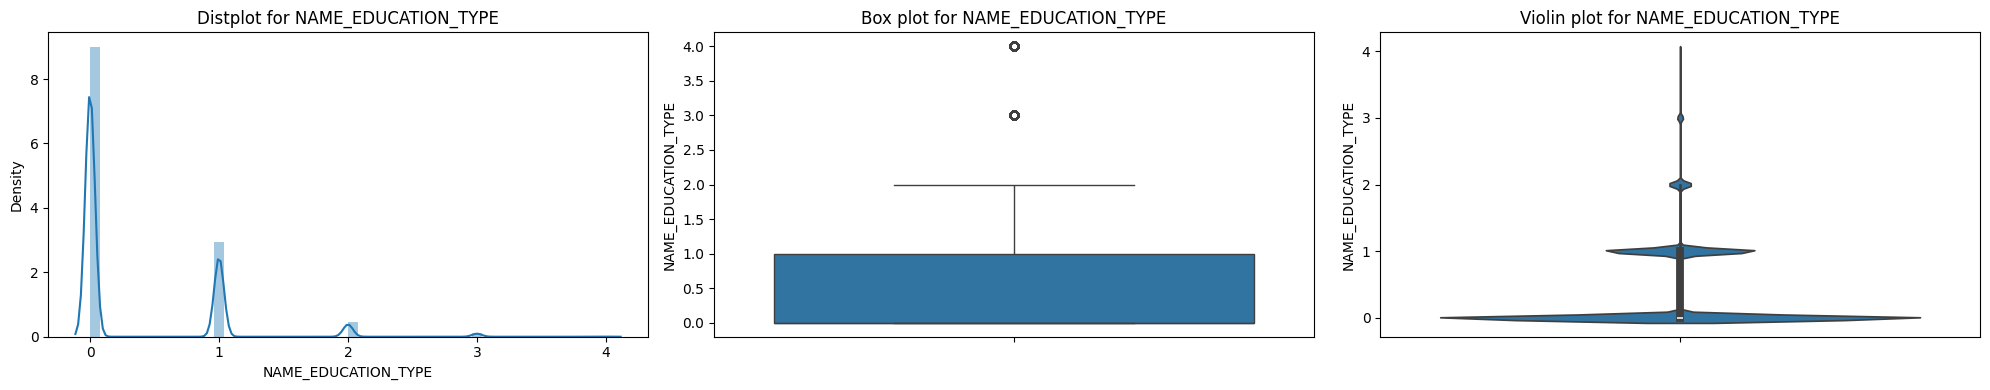

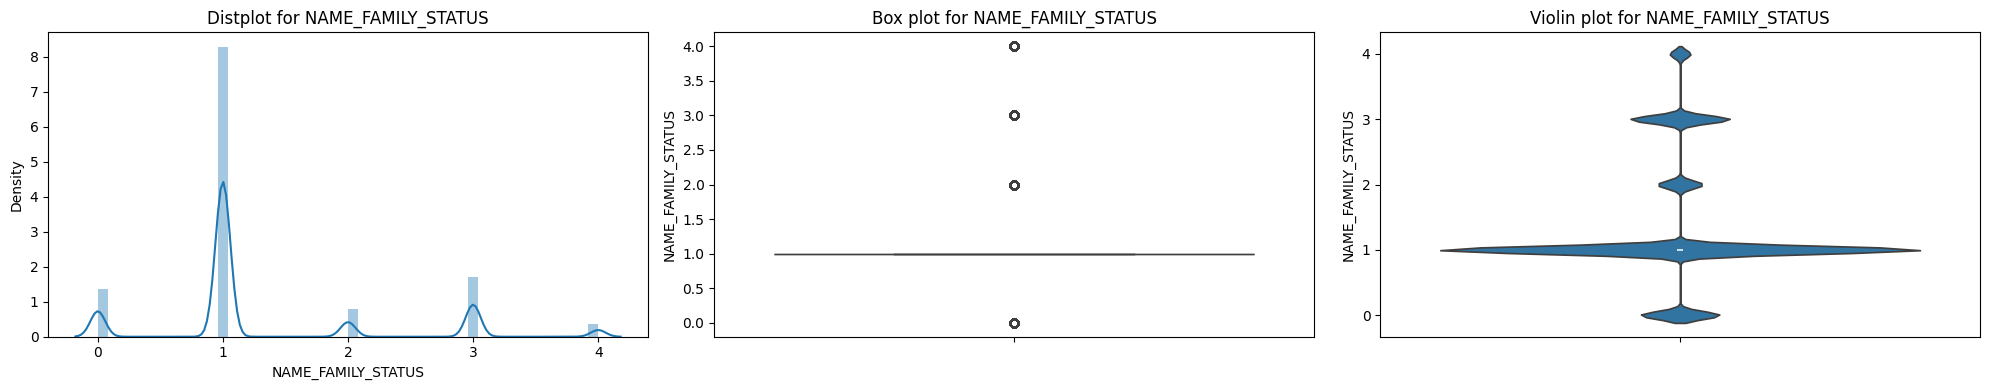

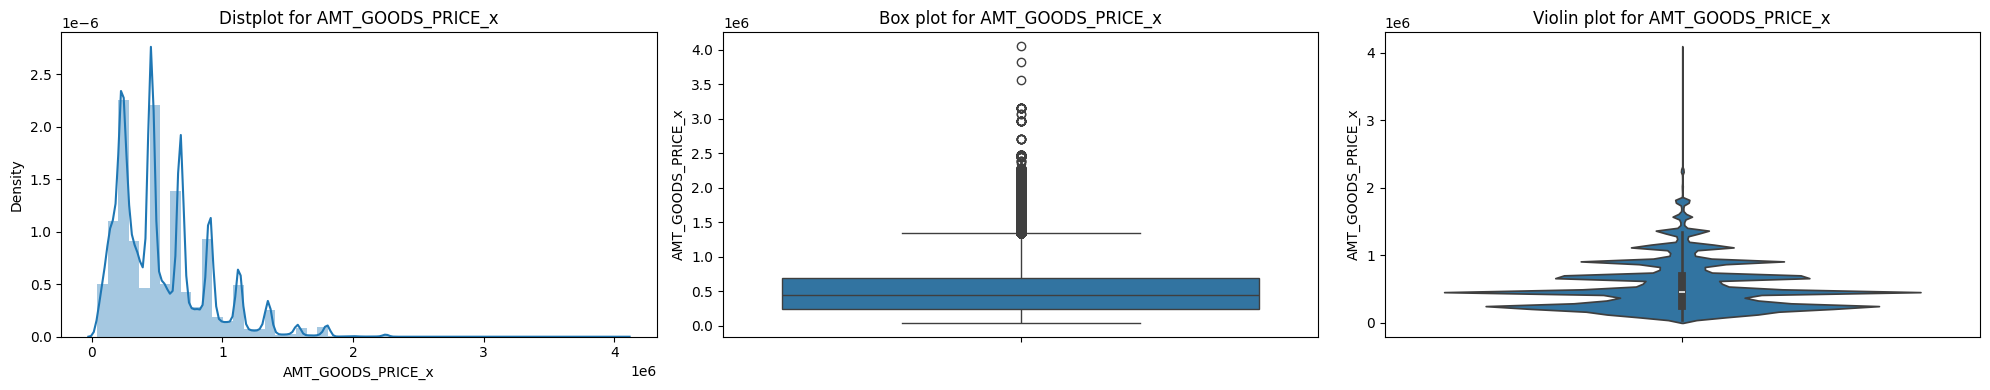

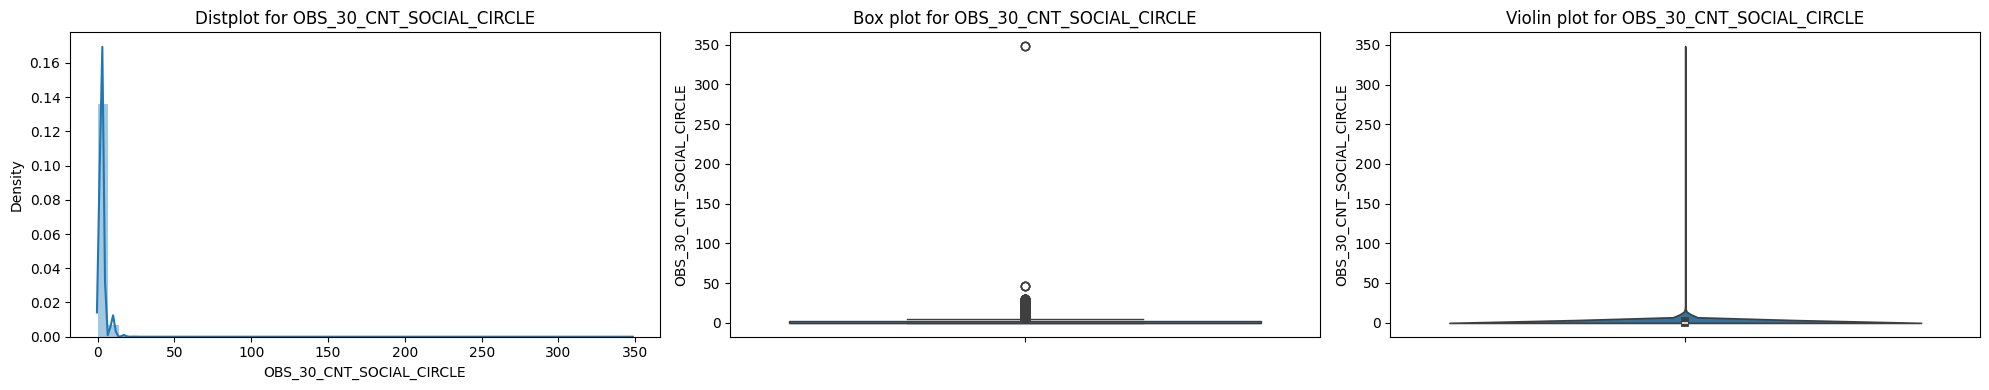

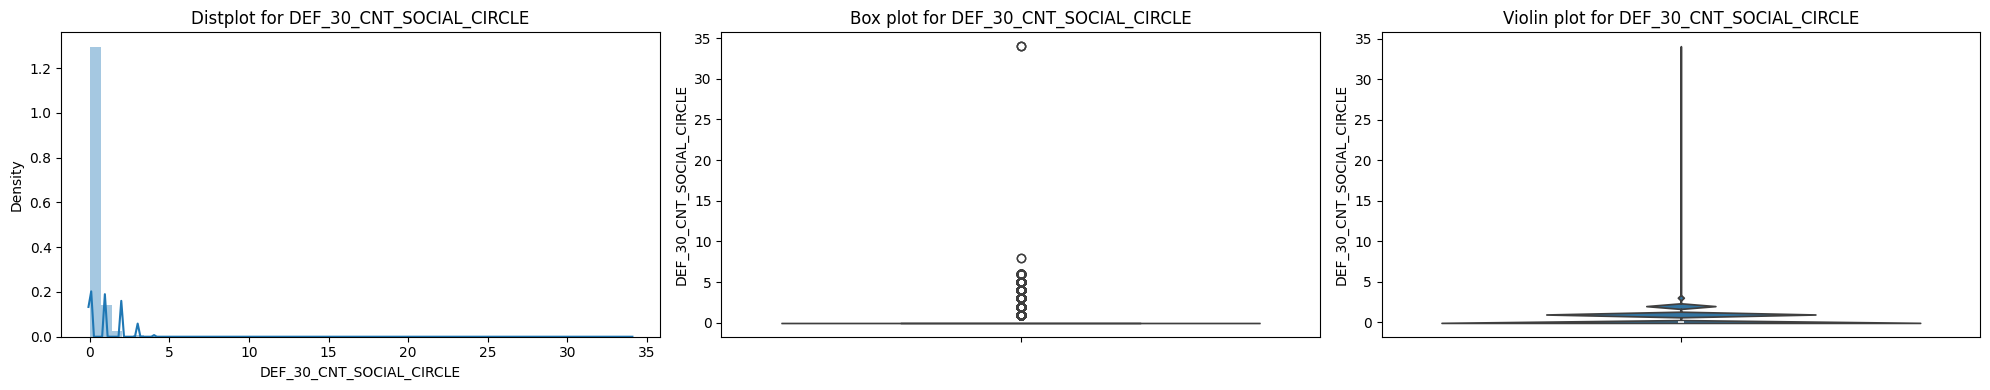

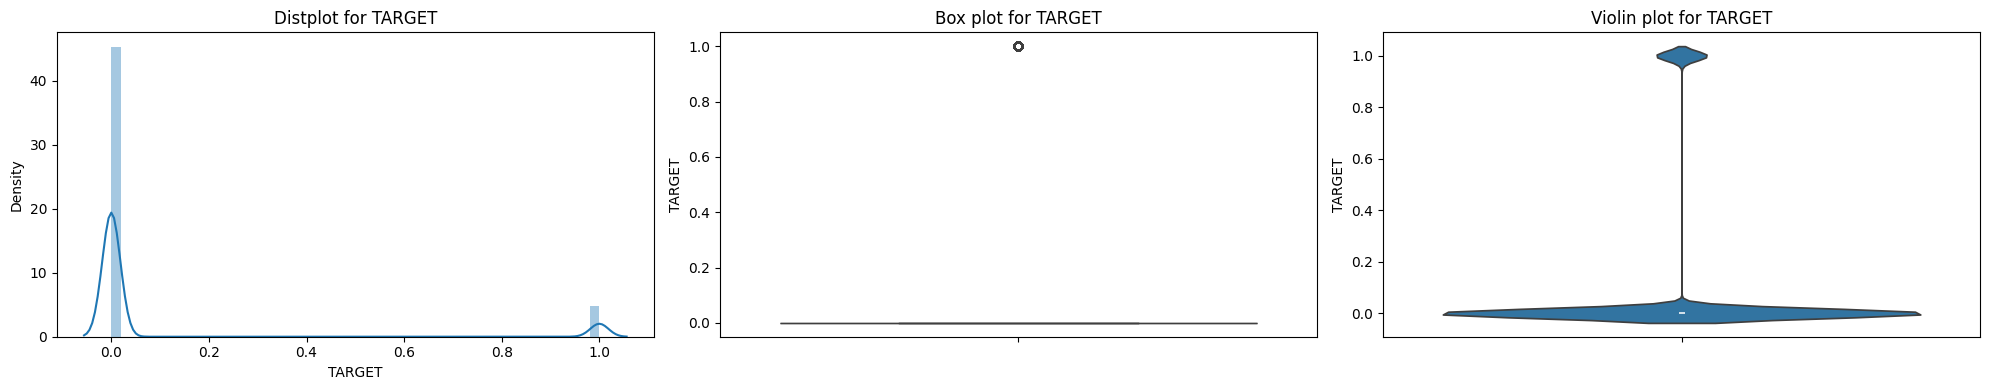

In [27]:
skewed_columns=['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'DAYS_EMPLOYED',
    'OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
    'AMT_GOODS_PRICE_x', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'TARGET']

for column in skewed_columns:
    skewplot(df, column)


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,956121.0,2.786024e+05,102923.532690,1.000020e+05,1.893380e+05,2.791240e+05,3.680730e+05,4.562550e+05
TARGET,956121.0,9.463865e-02,0.292715,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
NAME_CONTRACT_TYPE_x,956121.0,7.994176e-02,0.271203,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
CODE_GENDER,956121.0,3.766856e-01,0.484618,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
AMT_INCOME_TOTAL,956121.0,1.797996e+05,228781.084935,2.565000e+04,1.125000e+05,1.575000e+05,2.250000e+05,1.170000e+08
AMT_CREDIT_x,956121.0,5.976028e+05,385007.685268,4.500000e+04,2.842560e+05,5.185620e+05,8.086500e+05,4.050000e+06
AMT_ANNUITY_x,956121.0,2.775552e+04,14009.263039,1.980000e+03,1.750950e+04,2.596050e+04,3.552300e+04,2.250000e+05
AMT_GOODS_PRICE_x,956121.0,5.362321e+05,353069.486183,4.050000e+04,2.475000e+05,4.500000e+05,6.840000e+05,4.050000e+06
NAME_TYPE_SUITE_x,956121.0,5.262121e+00,1.739352,0.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,7.000000e+00
NAME_INCOME_TYPE,956121.0,3.441786e+00,2.207390,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [29]:

df1= df.copy()

In [30]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'OCCUPATION_TYPE', 'REG_REGION_NOT_LIVE_REGION', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_y',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT'

In [31]:
import numpy as np

# Apply square root transformation to the specified columns

df1["AMT_INCOME_TOTAL_sqrt"] = np.sqrt(df1["AMT_INCOME_TOTAL"])
df1["AMT_CREDIT_x_sqrt"] = np.sqrt(df1["AMT_CREDIT_x"])
df1["AMT_ANNUITY_x_sqrt"] = np.sqrt(df1["AMT_ANNUITY_x"])

df1["DAYS_EMPLOYED_sqrt"] = np.sqrt(df1["DAYS_EMPLOYED"])
df1["OCCUPATION_TYPE_sqrt"] = np.sqrt(df1["OCCUPATION_TYPE"])
df1["NAME_EDUCATION_TYPE_sqrt"] = np.sqrt(df1["NAME_EDUCATION_TYPE"])

df1["NAME_FAMILY_STATUS_sqrt"] = np.sqrt(df1["NAME_FAMILY_STATUS"])
df1["AMT_GOODS_PRICE_x_sqrt"] = np.sqrt(df1["AMT_GOODS_PRICE_x"])
df1["OBS_30_CNT_SOCIAL_CIRCLE_sqrt"] = np.sqrt(df1["OBS_30_CNT_SOCIAL_CIRCLE"])
df1["DEF_30_CNT_SOCIAL_CIRCLE_sqrt"] = np.sqrt(df1["DEF_30_CNT_SOCIAL_CIRCLE"])


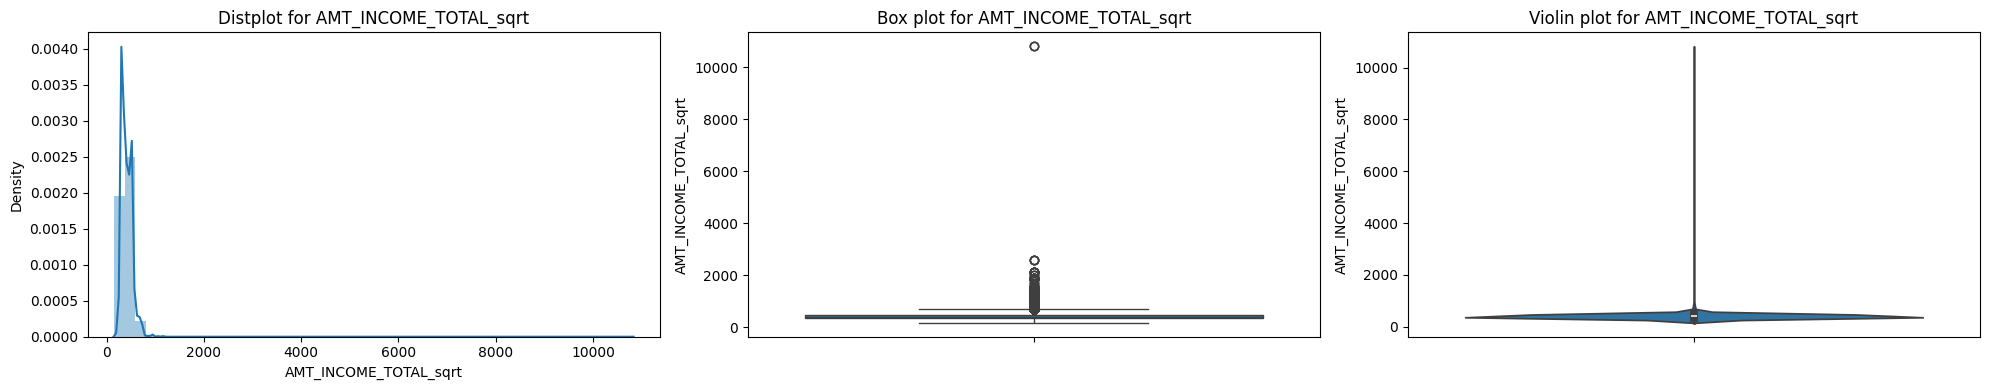

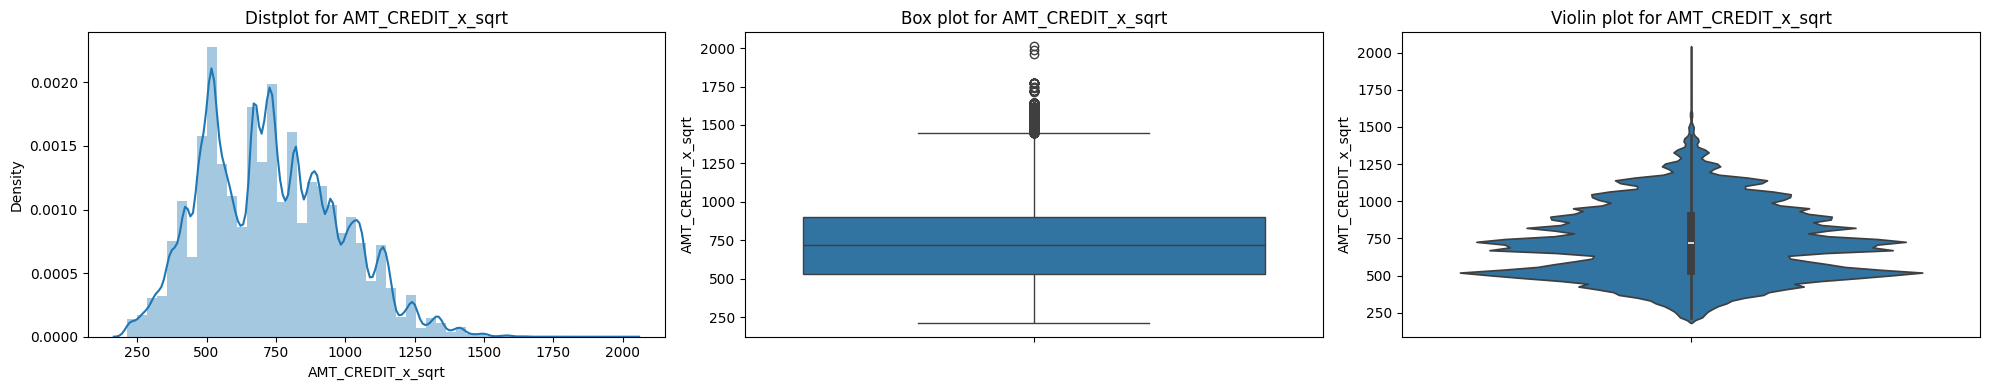

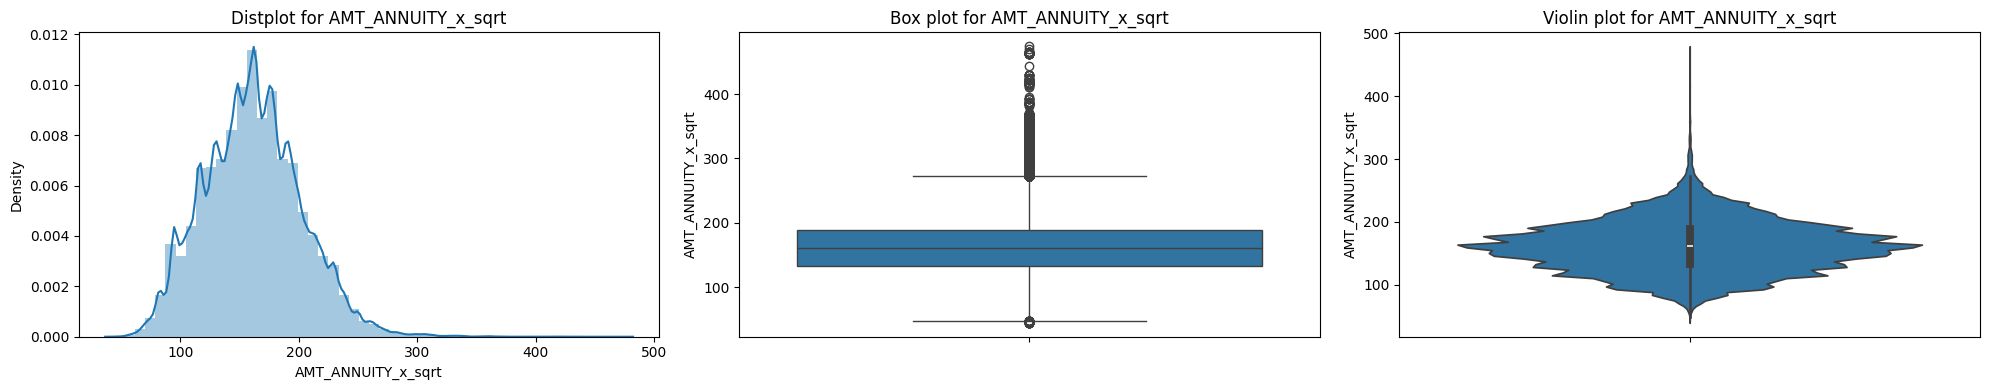

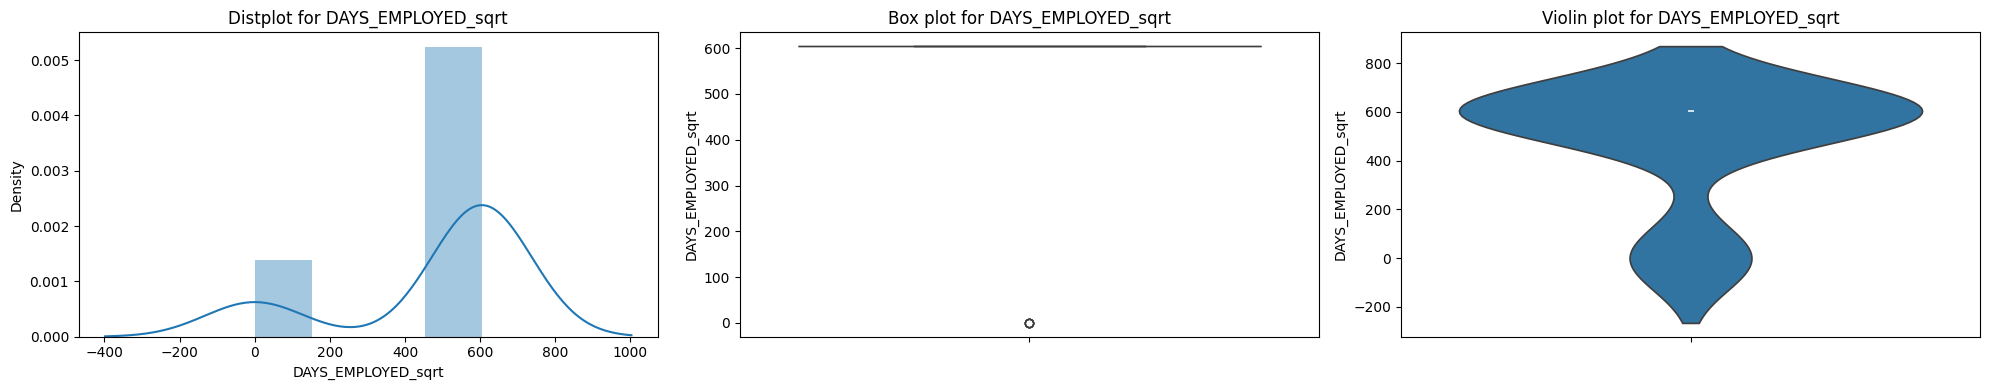

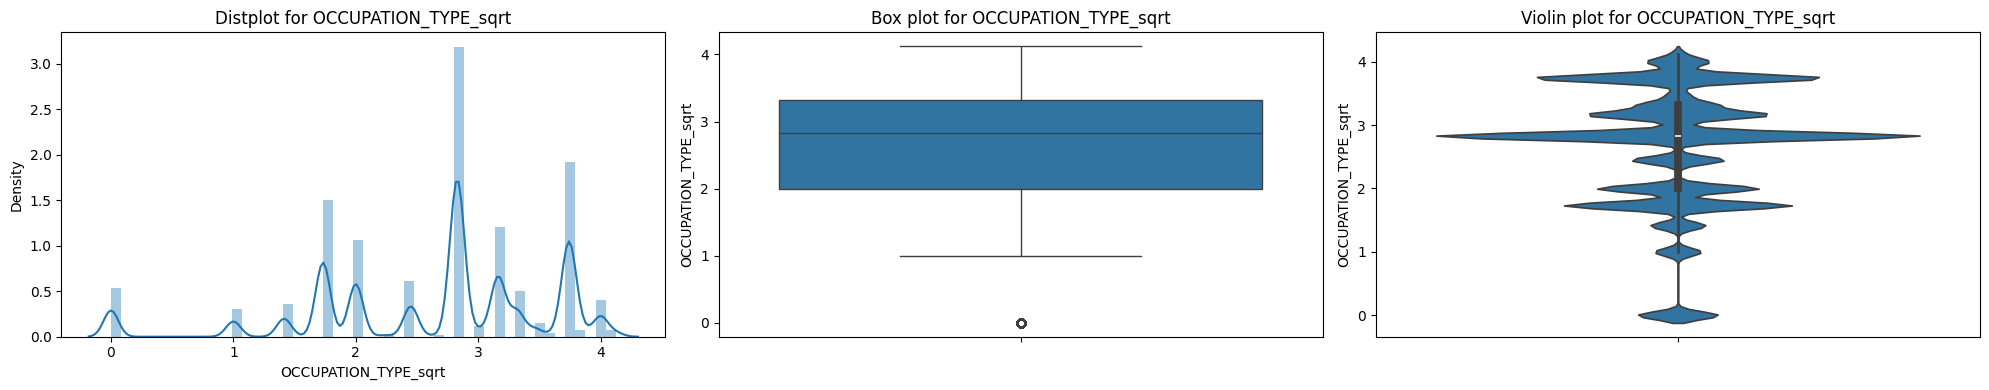

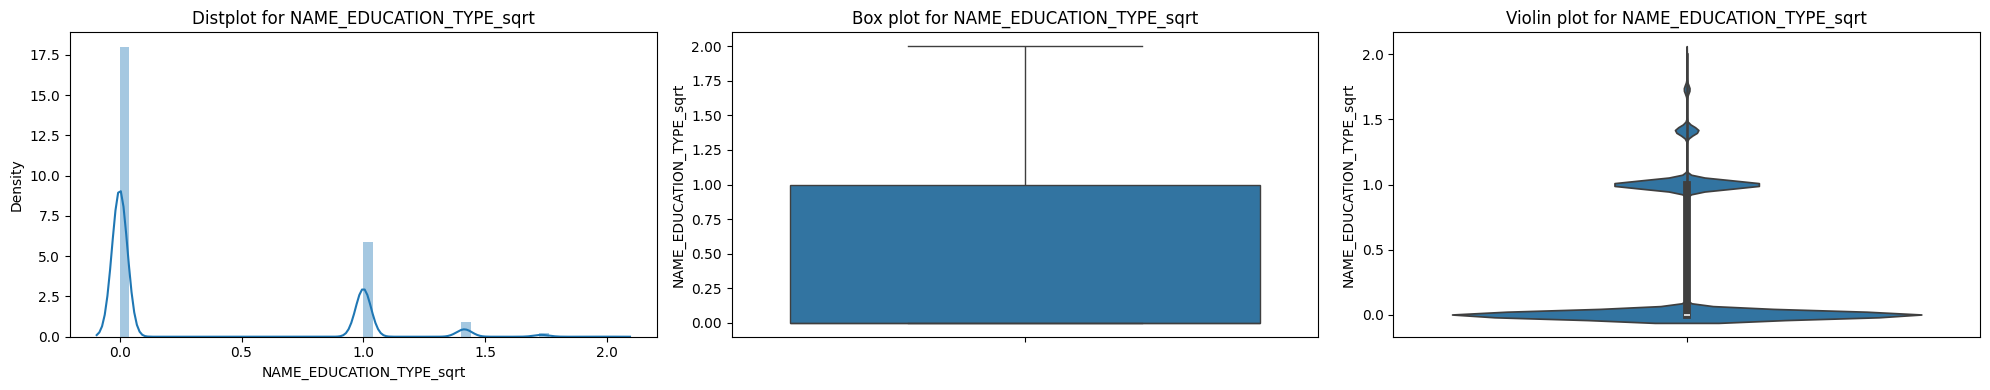

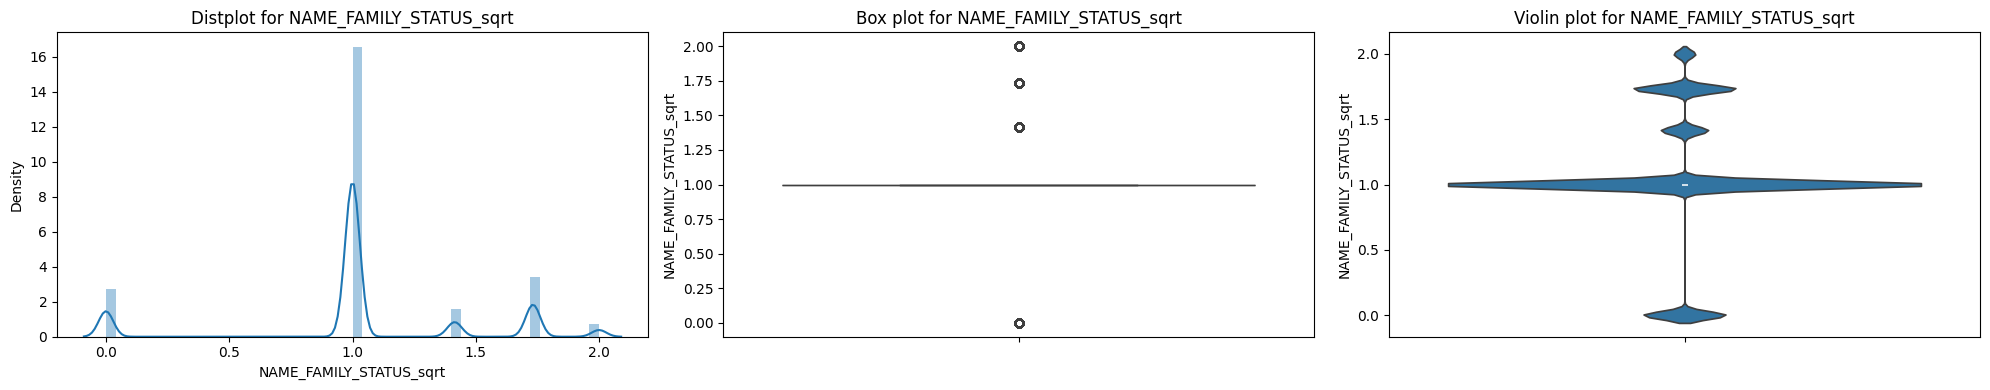

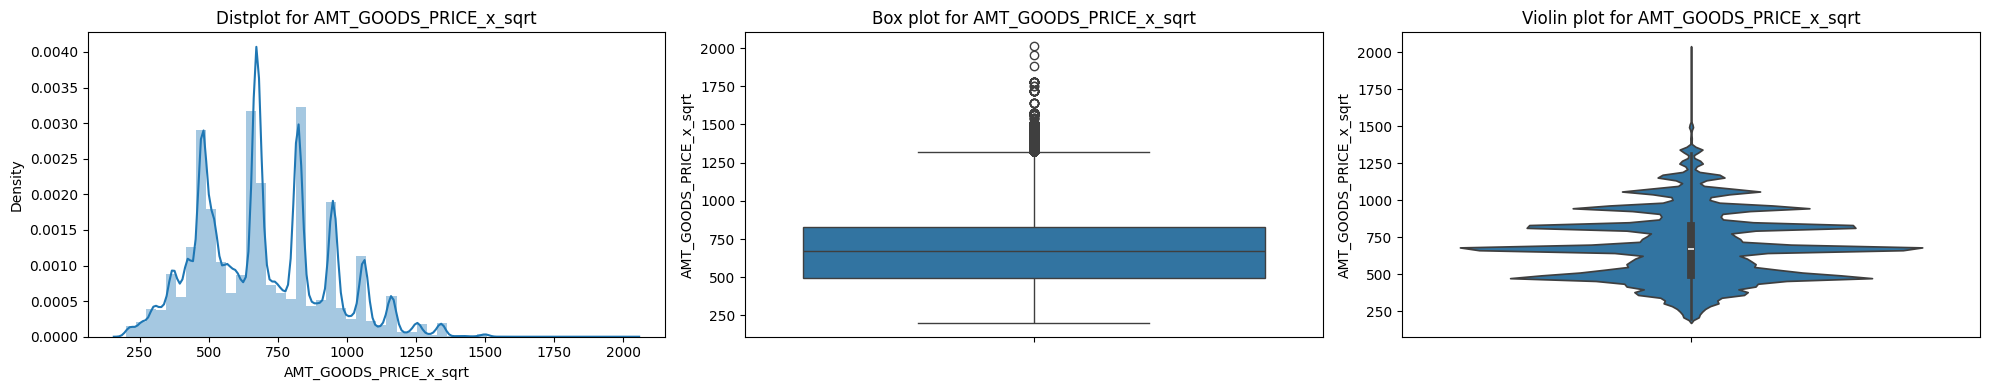

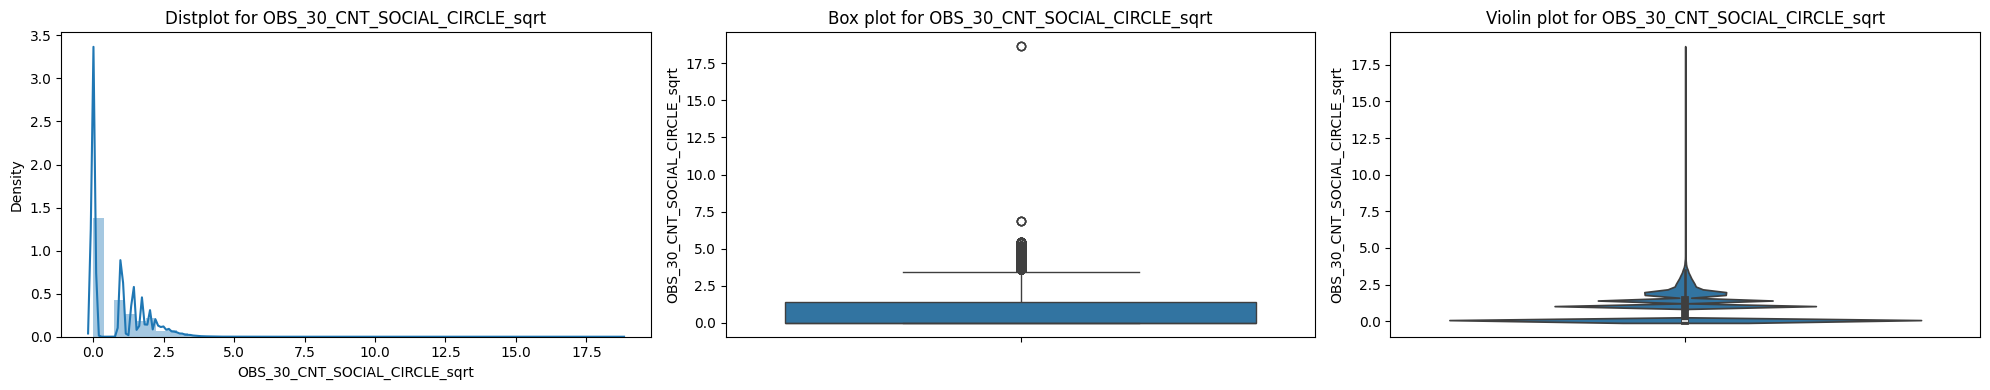

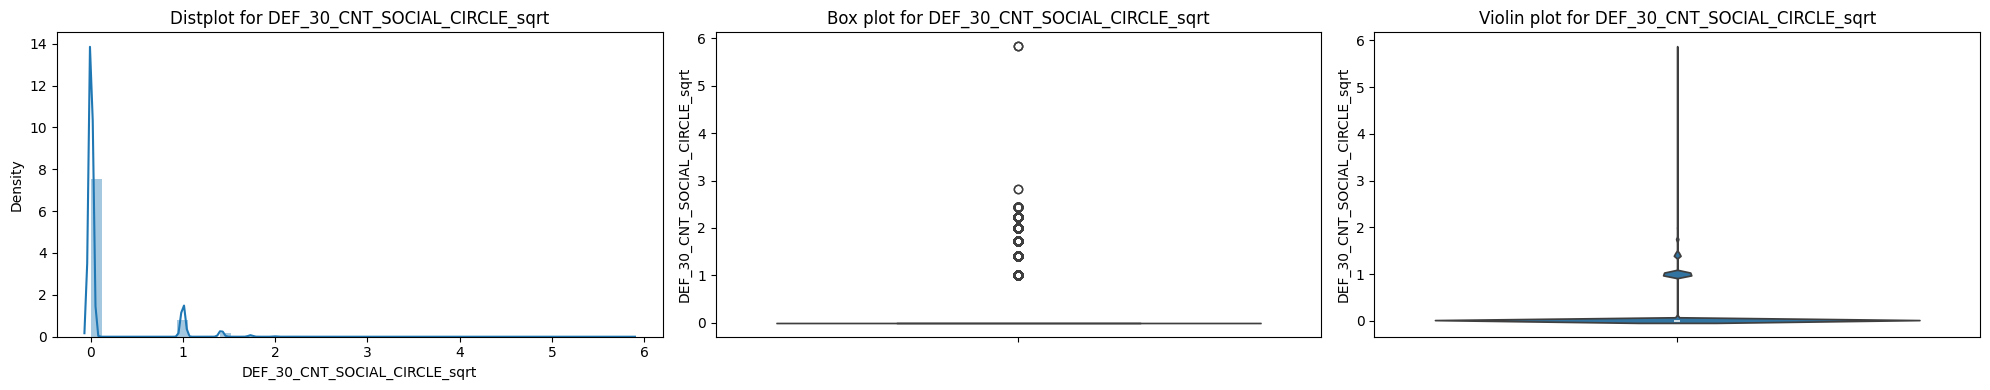

In [32]:

skwed_columns_2=["AMT_INCOME_TOTAL_sqrt","AMT_CREDIT_x_sqrt","AMT_ANNUITY_x_sqrt","DAYS_EMPLOYED_sqrt","OCCUPATION_TYPE_sqrt","NAME_EDUCATION_TYPE_sqrt","NAME_FAMILY_STATUS_sqrt","AMT_GOODS_PRICE_x_sqrt","OBS_30_CNT_SOCIAL_CIRCLE_sqrt","DEF_30_CNT_SOCIAL_CIRCLE_sqrt"]
for i in skwed_columns_2:
  skewplot(df1,i)

In [33]:
df1.shape

(956121, 69)

In [34]:
df1.to_csv("Data.csv",index=False)

In [35]:
  # Outliers Handling - Interquartile Range(IQR) Method

In [36]:
df2= df1.copy()

In [37]:

def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)


In [38]:
df2.describe().T


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,956121.0,2.786024e+05,102923.532690,1.000020e+05,1.893380e+05,2.791240e+05,3.680730e+05,4.562550e+05
TARGET,956121.0,9.463865e-02,0.292715,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
NAME_CONTRACT_TYPE_x,956121.0,7.994176e-02,0.271203,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
CODE_GENDER,956121.0,3.766856e-01,0.484618,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
AMT_INCOME_TOTAL,956121.0,1.797996e+05,228781.084935,2.565000e+04,1.125000e+05,1.575000e+05,2.250000e+05,1.170000e+08
AMT_CREDIT_x,956121.0,5.976028e+05,385007.685268,4.500000e+04,2.842560e+05,5.185620e+05,8.086500e+05,4.050000e+06
AMT_ANNUITY_x,956121.0,2.775552e+04,14009.263039,1.980000e+03,1.750950e+04,2.596050e+04,3.552300e+04,2.250000e+05
AMT_GOODS_PRICE_x,956121.0,5.362321e+05,353069.486183,4.050000e+04,2.475000e+05,4.500000e+05,6.840000e+05,4.050000e+06
NAME_TYPE_SUITE_x,956121.0,5.262121e+00,1.739352,0.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,7.000000e+00
NAME_INCOME_TYPE,956121.0,3.441786e+00,2.207390,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [39]:
df2["DEF_30_CNT_SOCIAL_CIRCLE"].min()

0.0

In [40]:
df2["DEF_30_CNT_SOCIAL_CIRCLE"].max()

34.0

In [41]:
outlier_columns= ['AMT_INCOME_TOTAL_sqrt',
       'AMT_CREDIT_x_sqrt', 'AMT_ANNUITY_x_sqrt', 'DAYS_EMPLOYED_sqrt',
       'OCCUPATION_TYPE_sqrt', 'NAME_EDUCATION_TYPE_sqrt',
       'NAME_FAMILY_STATUS_sqrt', 'AMT_GOODS_PRICE_x_sqrt',
       'OBS_30_CNT_SOCIAL_CIRCLE_sqrt', 'DEF_30_CNT_SOCIAL_CIRCLE_sqrt']
for i in outlier_columns:
  outlier(df2,i)


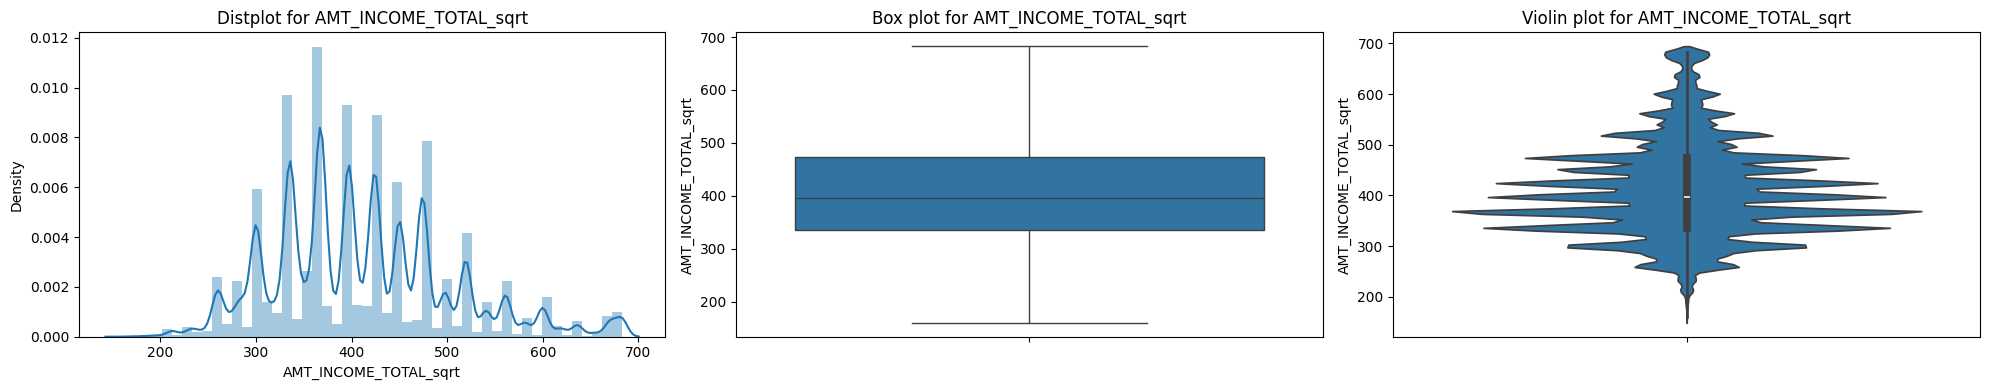

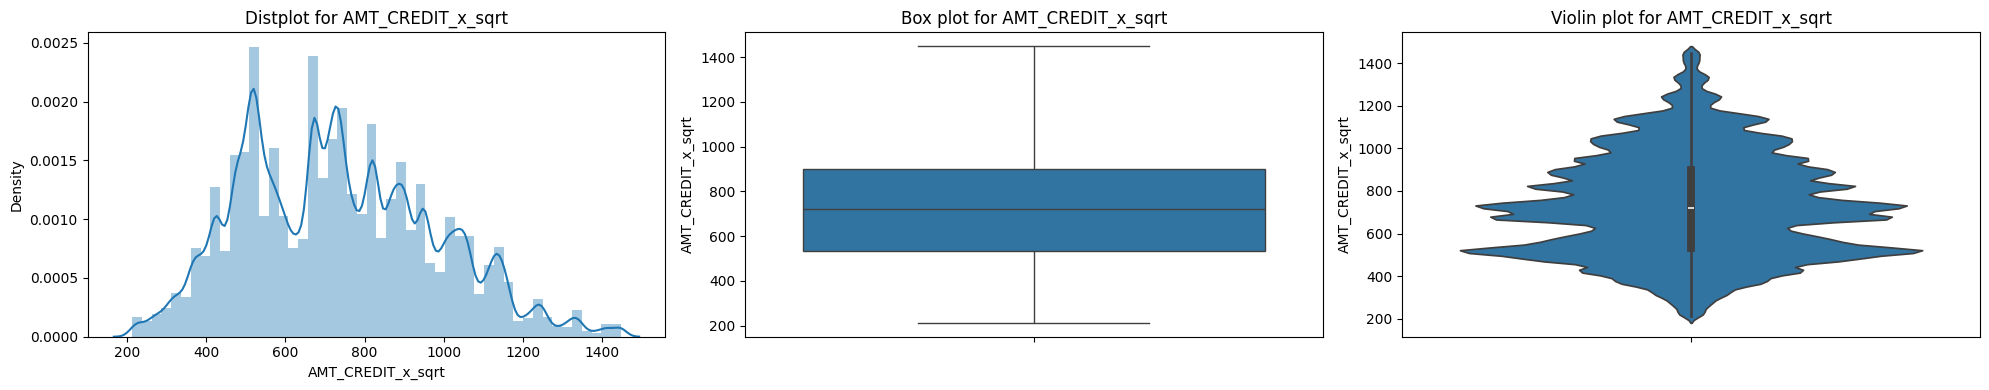

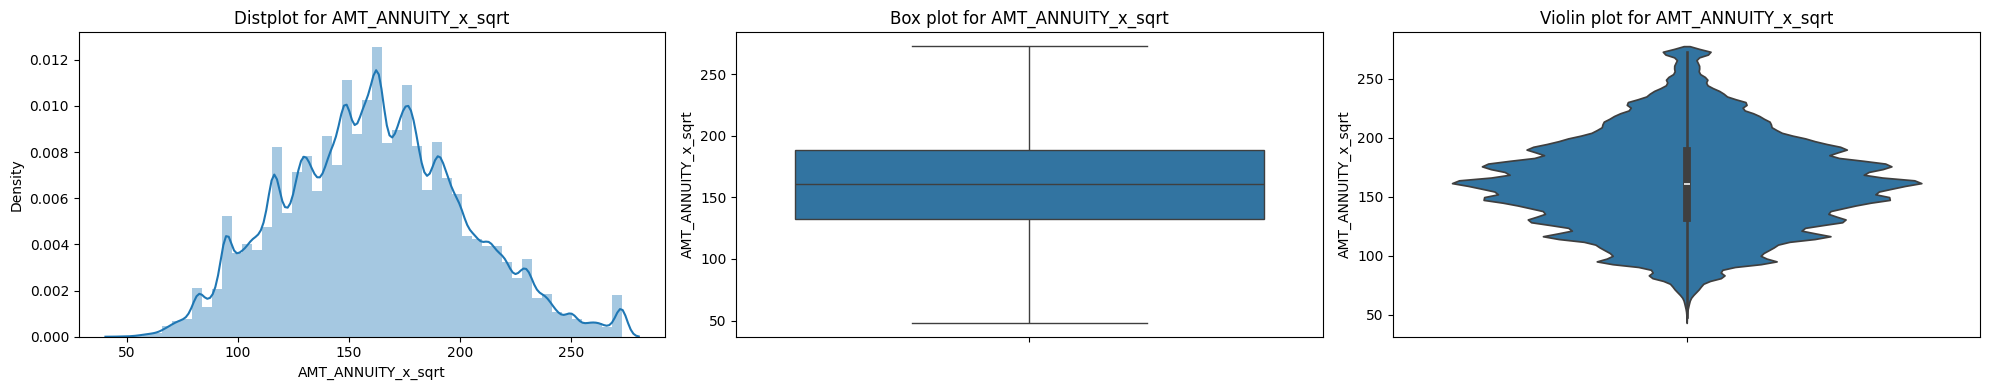

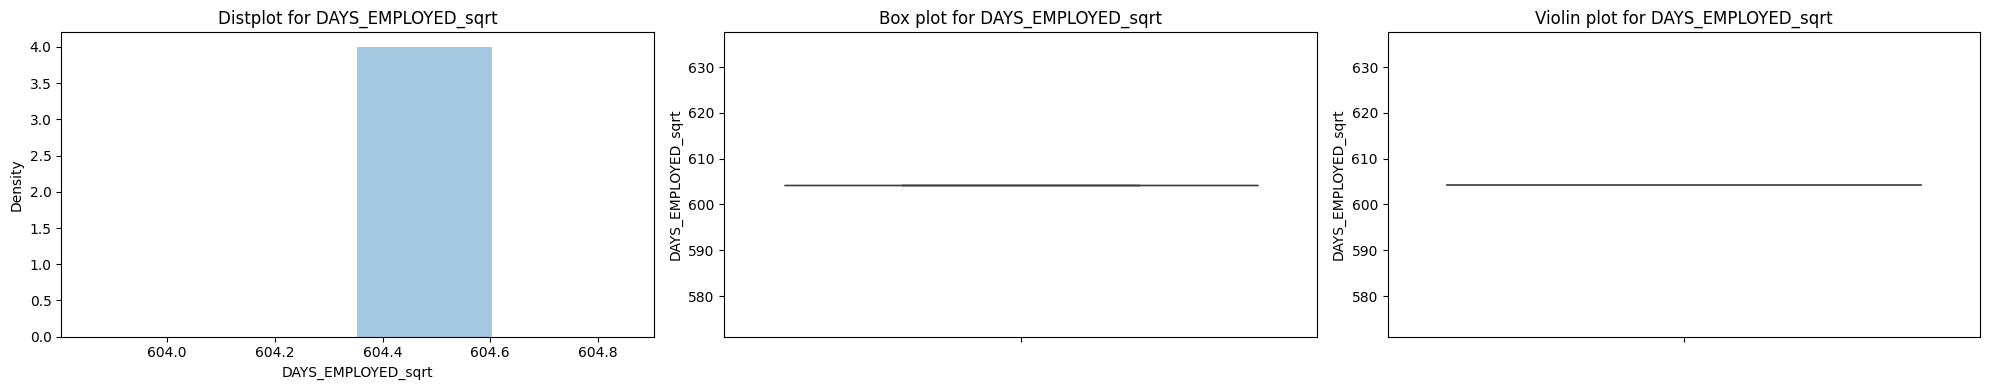

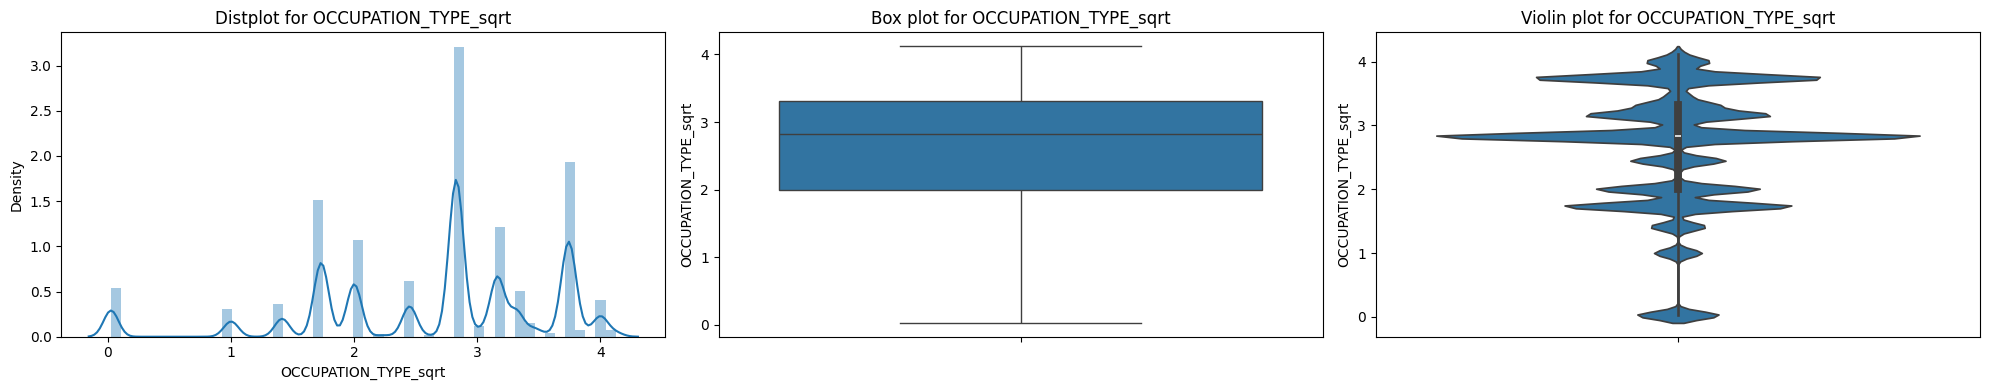

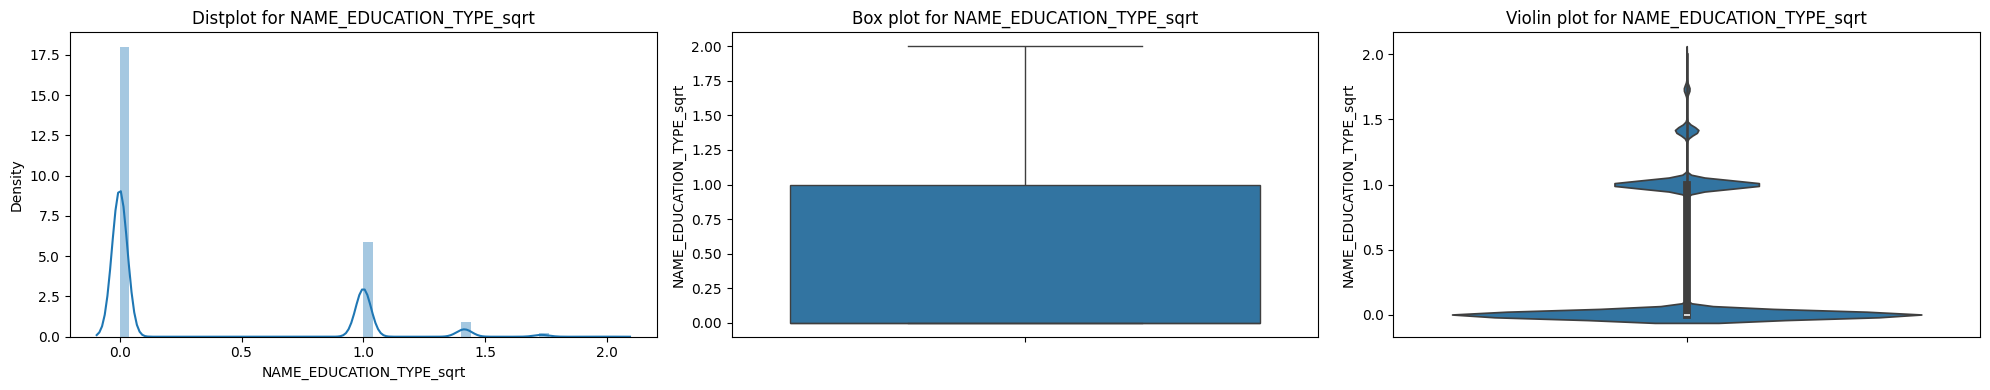

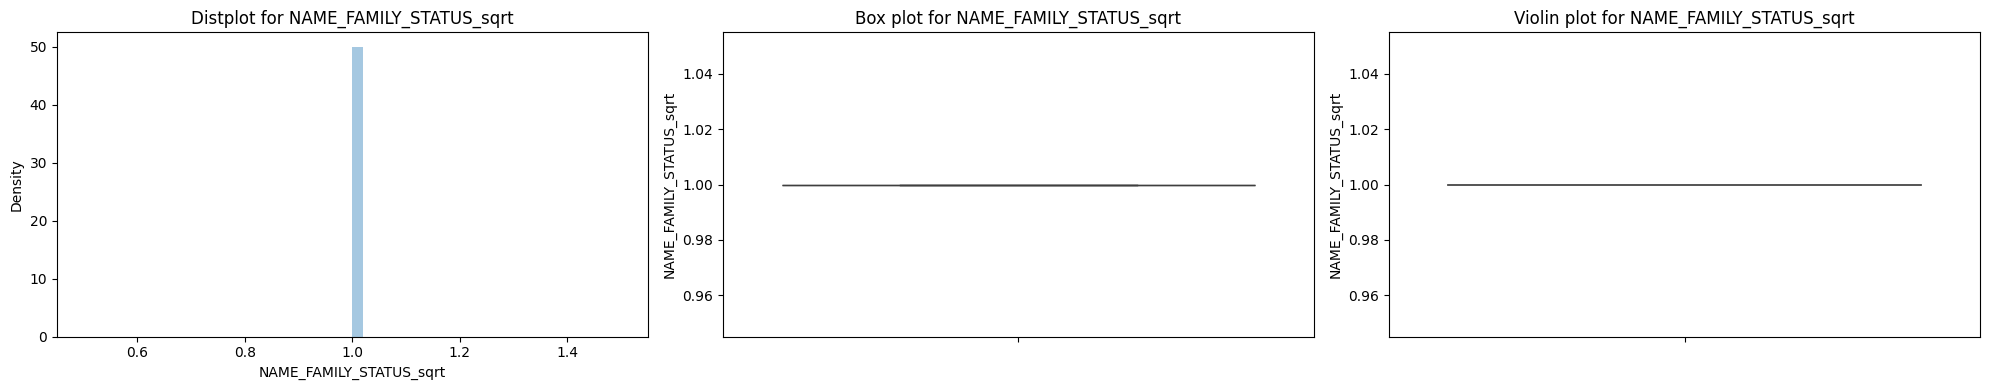

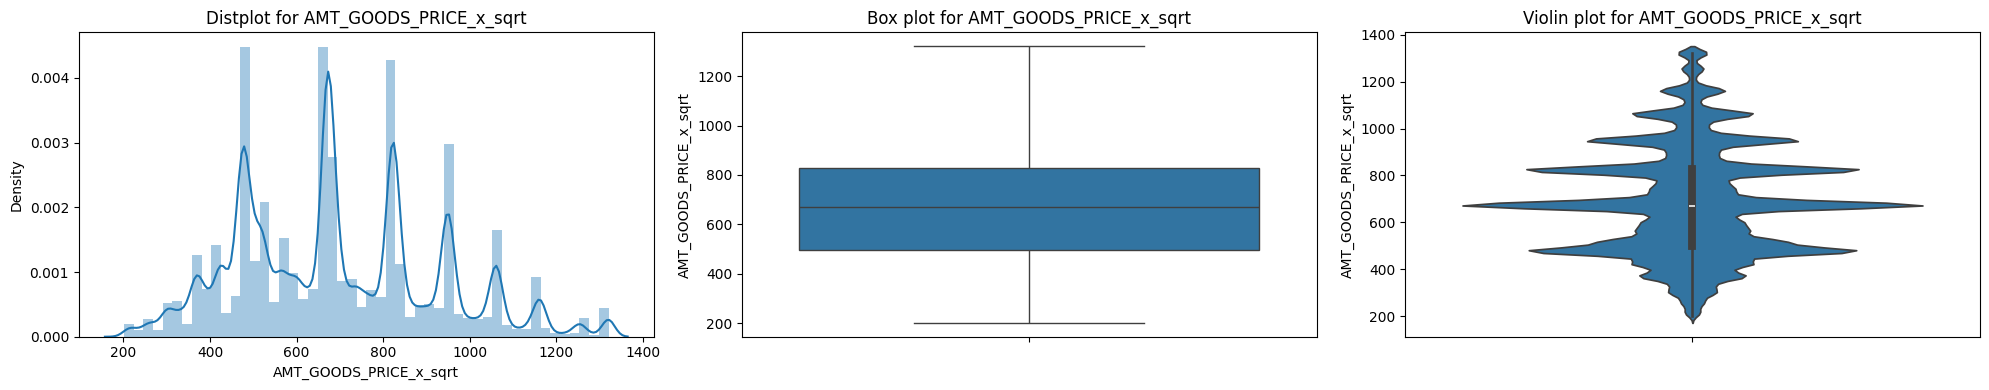

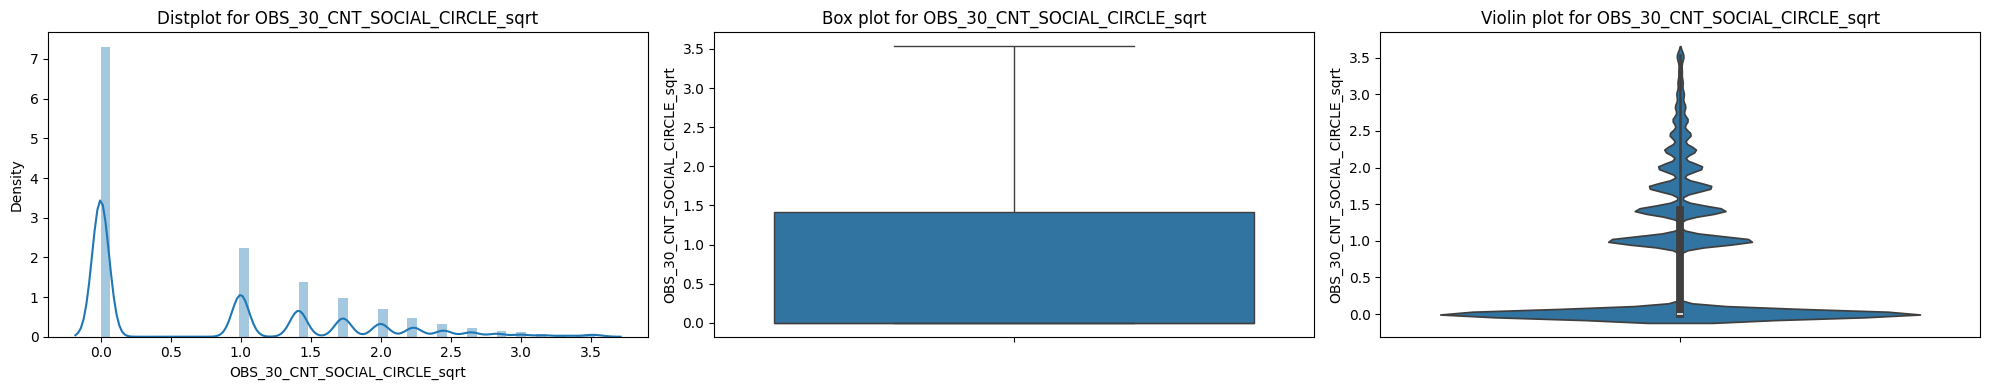

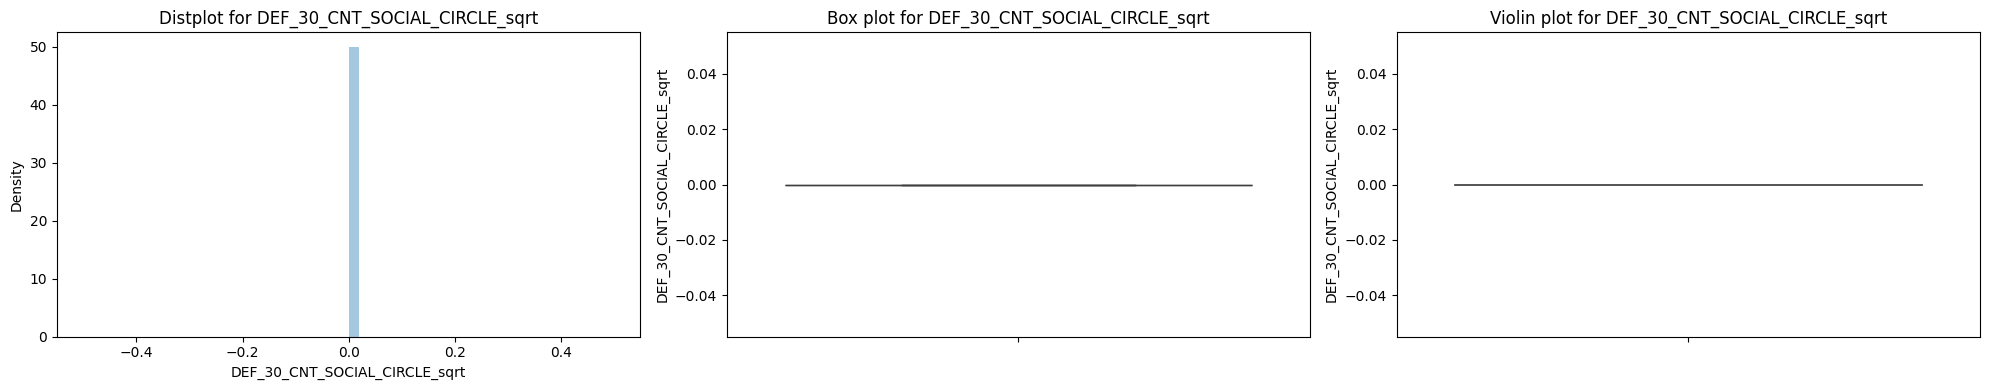

In [42]:

for i in outlier_columns:
  skewplot(df2,i)

In [43]:
diff=df2[['AMT_INCOME_TOTAL_sqrt',
       'AMT_CREDIT_x_sqrt', 'AMT_ANNUITY_x_sqrt',
       'OBS_30_CNT_SOCIAL_CIRCLE_sqrt', 'DEF_30_CNT_SOCIAL_CIRCLE_sqrt',
       'OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS',"TARGET"]]

In [44]:
diff.to_csv("Datae.csv",index=False)

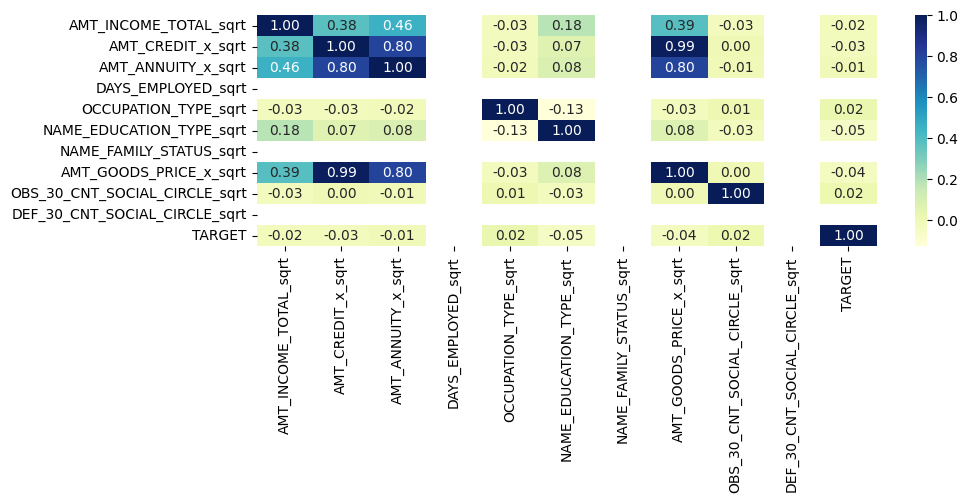

In [45]:
dff = df2[['AMT_INCOME_TOTAL_sqrt',
       'AMT_CREDIT_x_sqrt', 'AMT_ANNUITY_x_sqrt', 'DAYS_EMPLOYED_sqrt',
       'OCCUPATION_TYPE_sqrt', 'NAME_EDUCATION_TYPE_sqrt',
       'NAME_FAMILY_STATUS_sqrt', 'AMT_GOODS_PRICE_x_sqrt',
       'OBS_30_CNT_SOCIAL_CIRCLE_sqrt', 'DEF_30_CNT_SOCIAL_CIRCLE_sqrt',"TARGET"]]

# Calculate the correlation matrix
corr = dff.corr()

# Plot the heatmap
plt.figure(figsize=(10, 3))
sns.heatmap(corr, annot=True, fmt=".2f",cmap="YlGnBu")
plt.show()


In [46]:
dff = dff.drop(columns=["AMT_GOODS_PRICE_x_sqrt"])


In [47]:
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL_sqrt,956121.0,410.780216,92.786007,160.156174,335.410197,396.862697,474.341649,682.738828
AMT_CREDIT_x_sqrt,956121.0,733.768644,242.304002,212.132034,533.156637,720.112491,899.249687,1448.389262
AMT_ANNUITY_x_sqrt,956121.0,161.307973,40.332601,48.095474,132.323467,161.122624,188.475463,272.703456
DAYS_EMPLOYED_sqrt,24.0,604.353373,0.000000,604.353373,604.353373,604.353373,604.353373,604.353373
OCCUPATION_TYPE_sqrt,956121.0,2.651208,0.948375,0.025063,2.000000,2.828427,3.316625,4.123106
NAME_EDUCATION_TYPE_sqrt,956121.0,0.302045,0.494169,0.000000,0.000000,0.000000,1.000000,2.000000
NAME_FAMILY_STATUS_sqrt,956121.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
OBS_30_CNT_SOCIAL_CIRCLE_sqrt,956121.0,0.800782,0.941205,0.000000,0.000000,0.000000,1.414214,3.535534
DEF_30_CNT_SOCIAL_CIRCLE_sqrt,956121.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TARGET,956121.0,0.094639,0.292715,0.000000,0.000000,0.000000,0.000000,1.000000


Model Training

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

In [49]:
from imblearn.over_sampling import RandomOverSampler

In [50]:
values = dff.drop('TARGET', axis=1)
tar = dff['TARGET']

In [51]:
ro = RandomOverSampler(random_state= 46)

In [52]:
re_data, re_tar = ro.fit_resample(values, tar)

In [53]:
re_data['TARGET'] = re_tar

In [54]:

re_data['TARGET'].value_counts()

TARGET
1    865635
0    865635
Name: count, dtype: int64

In [55]:
re_data.shape

(1731270, 10)

In [56]:
val = re_data.drop('TARGET', axis=1)
tar = re_data['TARGET']

In [57]:
X_train, X_test, y_train, y_test  = train_test_split(val, tar, test_size= 0.2, random_state=46)

In [58]:
# balancing imbalance data

In [59]:
dfg = df2[['AMT_INCOME_TOTAL_sqrt',
       'AMT_CREDIT_x_sqrt', 'AMT_ANNUITY_x_sqrt',
       'OCCUPATION_TYPE_sqrt', 'NAME_EDUCATION_TYPE_sqrt',
       'NAME_FAMILY_STATUS_sqrt',
       'OBS_30_CNT_SOCIAL_CIRCLE_sqrt', 'DEF_30_CNT_SOCIAL_CIRCLE_sqrt',"TARGET"]]

In [60]:
value = dfg.drop('TARGET', axis=1)
targ = dfg['TARGET']
ro = RandomOverSampler(random_state= 46)
re_data, re_tar = ro.fit_resample(value, targ)
re_data['TARGET'] = re_tar

va = re_data.drop('TARGET', axis=1)
ta = re_data['TARGET']
X1_train, X1_test, y1_train, y1_test  = train_test_split(va, ta, test_size= 0.2, random_state=46)

In [61]:
re_data.shape

(1731270, 9)

In [62]:
# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier
knn.fit(X1_train, y1_train)

# Predict the labels
y_pred = knn.predict(X1_test)

# Evaluate the classifier
accuracy = accuracy_score(y1_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y1_test, y_pred)
print(f"Confusion Matrix:\n{cm}")


Accuracy: 0.9728840677652821
Confusion Matrix:
[[165493   7735]
 [  1654 171372]]


Confusion Matrix:
[[165493   7735]
 [  1654 171372]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97    173228
           1       0.96      0.99      0.97    173026

    accuracy                           0.97    346254
   macro avg       0.97      0.97      0.97    346254
weighted avg       0.97      0.97      0.97    346254



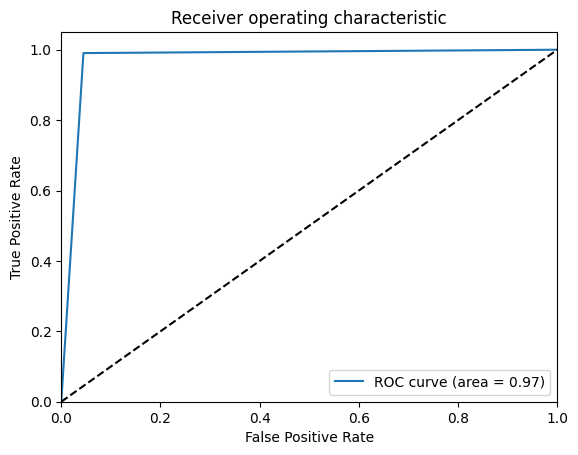

In [64]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y1_test, y_pred))
print("Classification Report:")
print(classification_report(y1_test, y_pred))
false, true, thresholds = roc_curve(y1_test, y_pred)
roc_auc = auc(false, true)
plt.plot(false, true, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [65]:
''' 'AMT_INCOME_TOTAL_sqrt',
       'AMT_CREDIT_x_sqrt', 'AMT_ANNUITY_x_sqrt',
       'OCCUPATION_TYPE_sqrt', 'NAME_EDUCATION_TYPE_sqrt',
       'NAME_FAMILY_STATUS_sqrt',
       'OBS_30_CNT_SOCIAL_CIRCLE_sqrt', 'DEF_30_CNT_SOCIAL_CIRCLE_sqrt',"TARGET" '''

' \'AMT_INCOME_TOTAL_sqrt\',\n       \'AMT_CREDIT_x_sqrt\', \'AMT_ANNUITY_x_sqrt\',\n       \'OCCUPATION_TYPE_sqrt\', \'NAME_EDUCATION_TYPE_sqrt\',\n       \'NAME_FAMILY_STATUS_sqrt\',\n       \'OBS_30_CNT_SOCIAL_CIRCLE_sqrt\', \'DEF_30_CNT_SOCIAL_CIRCLE_sqrt\',"TARGET" '

In [66]:
sample = np.array([[np.sqrt(202500.0),np.sqrt(406597.5),np.sqrt(24700.5),8,0,3,np.sqrt(2.0),np.sqrt (2.0)]])
pred = knn.predict(sample)
if pred==1:
    print('The status is: Repay')
else:
    print('The status is: Wont Repay')   # sample prediction # correct prediction


The status is: Repay


In [67]:
sample = np.array([[np.sqrt(270000.0),np.sqrt(1293502.5),np.sqrt(35698.5),1,1,3,np.sqrt(1.0),np.sqrt (0.0)]])

pred = knn.predict(sample)
if pred==1:
    print('The status is: Repay')
else:
    print('The status is: Wont Repay')  # correct prediction

The status is: Wont Repay


In [68]:
from sklearn.tree import DecisionTreeClassifier   # Decision tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

decision_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=25,
    min_samples_split=5,
    min_samples_leaf=5
)

# Fit
decision_tree.fit(X1_train_scaled, y1_train)

# Predict the labels
y_pred = decision_tree.predict(X1_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y1_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y1_test, y_pred)
print(f"Confusion Matrix:\n{cm}")


Accuracy: 0.8946062716965003
Confusion Matrix:
[[145469  27759]
 [  8734 164292]]


Confusion Matrix:
[[145469  27759]
 [  8734 164292]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89    173228
           1       0.86      0.95      0.90    173026

    accuracy                           0.89    346254
   macro avg       0.90      0.89      0.89    346254
weighted avg       0.90      0.89      0.89    346254



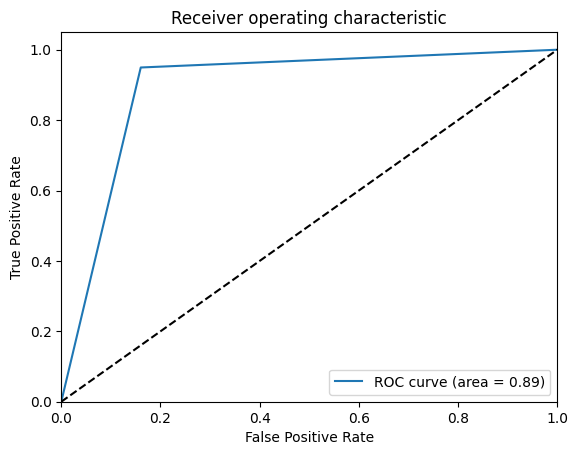

In [69]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y1_test, y_pred))
print("Classification Report:")
print(classification_report(y1_test, y_pred))
false, true, thresholds = roc_curve(y1_test, y_pred)
roc_auc = auc(false, true)
plt.plot(false, true, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')                                           #  DECISON TREE
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [70]:
from sklearn.ensemble import RandomForestClassifier    # random forest
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
X1_train_scaled = scaler2.fit_transform(X1_train)
X1_test_scaled = scaler2.transform(X1_test)

random_forest = RandomForestClassifier(
    n_estimators=300,
    max_depth=18,
    min_samples_split=15,
    min_samples_leaf=8,
    criterion='gini',
    max_features='sqrt'
)

# Fit
random_forest.fit(X1_train_scaled, y1_train)

# Predict
y_pred_rf = random_forest.predict(X1_test_scaled)

# Evaluate the classifier
accuracy_rf = accuracy_score(y1_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")
cm_rf = confusion_matrix(y1_test, y_pred_rf)
print(f"Confusion Matrix:\n{cm_rf}")


Accuracy: 0.8901500054873013
Confusion Matrix:
[[145527  27701]
 [ 10335 162691]]


Confusion Matrix:
[[145469  27759]
 [  8734 164292]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89    173228
           1       0.86      0.95      0.90    173026

    accuracy                           0.89    346254
   macro avg       0.90      0.89      0.89    346254
weighted avg       0.90      0.89      0.89    346254



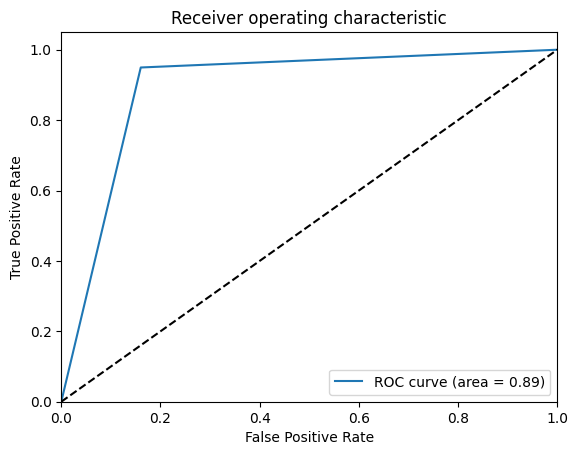

In [71]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y1_test, y_pred))
print("Classification Report:")
print(classification_report(y1_test, y_pred))
false, true, thresholds = roc_curve(y1_test, y_pred)
roc_auc = auc(false, true)
plt.plot(false, true, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [72]:
from xgboost import XGBClassifier   # xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler3 = StandardScaler()
X1_train_scaled = scaler3.fit_transform(X1_train)
X1_test_scaled = scaler3.transform(X1_test)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
                    n_estimators=550,
                    max_depth=8,
                    learning_rate=0.4,
                    subsample=0.9,
                    colsample_bytree=0.9)

# Fit
xgb.fit(X1_train_scaled, y1_train)

# Predict
y_pred = xgb.predict(X1_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y1_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y1_test, y_pred)
print(f"Confusion Matrix:\n{cm}")


Accuracy: 0.9376007208580984
Confusion Matrix:
[[158764  14464]
 [  7142 165884]]


Confusion Matrix:
[[158764  14464]
 [  7142 165884]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94    173228
           1       0.92      0.96      0.94    173026

    accuracy                           0.94    346254
   macro avg       0.94      0.94      0.94    346254
weighted avg       0.94      0.94      0.94    346254



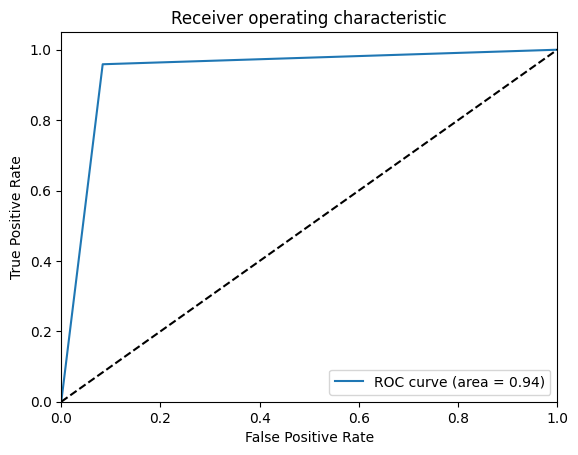

In [73]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y1_test, y_pred))
print("Classification Report:")
print(classification_report(y1_test, y_pred))

false, true, thresholds = roc_curve(y1_test, y_pred)
roc_auc = auc(false, true)
plt.plot(false, true, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [74]:
# Saving the model
import pickle
with open('knnmodel.pkl', 'wb') as file:
    pickle.dump(knn, file)

with open('dtmodel.pkl', 'wb') as file:
    pickle.dump(decision_tree, file)

with open('rfmodel.pkl', 'wb') as file:
    pickle.dump(random_forest, file)

with open('xgbmodel.pkl', 'wb') as file:
    pickle.dump(xgb, file)




In [75]:
with open('dtscaler.pkl', 'wb') as f:
    pickle.dump(scaler1, f)
with open('rfscaler.pkl', 'wb') as f:
    pickle.dump(scaler2, f)
with open('xgbscaler.pkl', 'wb') as f:
    pickle.dump(scaler3, f)


In [76]:
sample = np.array([[np.sqrt(202500.0),np.sqrt(406597.5),np.sqrt(24700.5),8,0,3,np.sqrt(2.0),np.sqrt (2.0)]])
pred = xgb.predict(sample)
if pred==1:
    print('The status is: Repay')
else:
    print('The status is: Wont Repay')

The status is: Repay
